# Arranque

## Librerias y levantar data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, expon, uniform
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
import pickle
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Cargar datos
path="/content/drive/MyDrive/Data Science y similares/Maestría Data Mining Exactas/AA/aa_mio/TP1/AA_tp1_eq1/"

#df = pd.read_csv("D:/Documentos/Estudio/Maestria/[01] Maestria Cs Datos/AA/TP1/dataset_TP1_final.csv")
archivo="dataset_TP1_final.csv"
datos = pd.read_csv(path+"dataset_TP1_final.csv")

<ipython-input-5-f258377c7884>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(path+"dataset_TP1_final.csv")


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     76518 non-null  int64  
 1   Estado Civil                                           76518 non-null  int64  
 2   Orden de prioridad                                     76518 non-null  int64  
 3   Carrera                                                76518 non-null  object 
 4   Asistencia diurna/nocturna                             76518 non-null  int64  
 5   Estudios máximos antes de la inscripción               76518 non-null  int64  
 6   Cualificación promedio de estudios previos             76518 non-null  int64  
 7   Estudios de la Madre                                   76518 non-null  int64  
 8   Estudios del Padre                            

In [ ]:
describe=round(pd.DataFrame(datos.describe()).T, 3)
describe.to_csv(path+"describe.csv")
describe

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500,22088.988,0.00,19129.25,38258.50,57387.75,76517.00
Estado Civil,76518.0,1.112,0.442,1.00,1.00,1.00,1.00,6.00
Orden de prioridad,76518.0,1.644,1.230,0.00,1.00,1.00,2.00,9.00
Asistencia diurna/nocturna,76518.0,0.915,0.278,0.00,1.00,1.00,1.00,1.00
Estudios máximos antes de la inscripción,76518.0,3.659,8.624,1.00,1.00,1.00,1.00,43.00
Cualificación promedio de estudios previos,76518.0,69.654,5.788,50.00,66.00,70.00,74.00,100.00
Estudios de la Madre,76518.0,19.838,15.399,1.00,1.00,19.00,37.00,44.00
Estudios del Padre,76518.0,23.425,14.921,1.00,4.00,19.00,37.00,44.00
Puntaje en examen de ingreso,76518.0,65.977,6.605,50.00,62.00,66.00,69.00,100.00
Necesita mudarse,76518.0,0.569,0.495,0.00,0.00,1.00,1.00,1.00


In [ ]:
describe=round(pd.DataFrame(datos.describe()).T, 3)
describe.to_csv(path+"describe.csv")
describe

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500,22088.988,0.00,19129.25,38258.50,57387.75,76517.00
Estado Civil,76518.0,1.112,0.442,1.00,1.00,1.00,1.00,6.00
Orden de prioridad,76518.0,1.644,1.230,0.00,1.00,1.00,2.00,9.00
Asistencia diurna/nocturna,76518.0,0.915,0.278,0.00,1.00,1.00,1.00,1.00
Estudios máximos antes de la inscripción,76518.0,3.659,8.624,1.00,1.00,1.00,1.00,43.00
Cualificación promedio de estudios previos,76518.0,69.654,5.788,50.00,66.00,70.00,74.00,100.00
Estudios de la Madre,76518.0,19.838,15.399,1.00,1.00,19.00,37.00,44.00
Estudios del Padre,76518.0,23.425,14.921,1.00,4.00,19.00,37.00,44.00
Puntaje en examen de ingreso,76518.0,65.977,6.605,50.00,62.00,66.00,69.00,100.00
Necesita mudarse,76518.0,0.569,0.495,0.00,0.00,1.00,1.00,1.00


## Exploración

In [ ]:
describe=round(pd.DataFrame(datos.describe()).T, 3)
describe.to_csv(path+"describe.csv")
describe

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500,22088.988,0.00,19129.25,38258.50,57387.75,76517.00
Estado Civil,76518.0,1.112,0.442,1.00,1.00,1.00,1.00,6.00
Orden de prioridad,76518.0,1.644,1.230,0.00,1.00,1.00,2.00,9.00
Asistencia diurna/nocturna,76518.0,0.915,0.278,0.00,1.00,1.00,1.00,1.00
Estudios máximos antes de la inscripción,76518.0,3.659,8.624,1.00,1.00,1.00,1.00,43.00
Cualificación promedio de estudios previos,76518.0,69.654,5.788,50.00,66.00,70.00,74.00,100.00
Estudios de la Madre,76518.0,19.838,15.399,1.00,1.00,19.00,37.00,44.00
Estudios del Padre,76518.0,23.425,14.921,1.00,4.00,19.00,37.00,44.00
Puntaje en examen de ingreso,76518.0,65.977,6.605,50.00,62.00,66.00,69.00,100.00
Necesita mudarse,76518.0,0.569,0.495,0.00,0.00,1.00,1.00,1.00


### Clasificación de variables

In [ ]:
nombres_columnas = datos.columns.tolist()

ordinales=[
 'Orden de prioridad',
]
booleanas=[
 'Necesita mudarse',
 'Necesidades educativas especiales',
 'Tiene deuda',
 'Pago de matrícula al día',
 'Poseedor de Beca',
 'Estudiante Internacional',
]
numericas=[
 'Edad al momento de la inscripción',
 'Cualificación promedio de estudios previos',
 'Puntaje en examen de ingreso',
 'Unidades curriculares 1er semestre (acreditadas)',
 'Unidades curriculares 1er semestre (inscrito)',
 'Cantidad de evaluaciones en el 1er semestre',
 'Unidades curriculares 1er semestre (aprobadas)',
 'Nota promedio en el 1er semestre',
 'Unidades curriculares 1er semestre (sin evaluaciones)',
 'Unidades curriculares 2do semestre (acreditadas)',
 'Unidades curriculares 2do semestre (inscrito)',
 'Cantidad de evaluaciones en el 2do semestre ',
 'Unidades curriculares 2do semestre (aprobadas)',
 'Nota promedio en el 2do semestre',
 'Unidades curriculares 2do semestre (sin evaluaciones)',
 'Tasa de desempleo en el momento de inscrición',
 'Inflación en el momento de inscrición',
 'Cambio annual del PBI en el momento de inscrición',
# Algunas son categoricas pero ya están codificadas como numéricas y puedo usarlas así
  'Sexo',
  'Asistencia diurna/nocturna',
]

categoricas=[
 'Estado Civil',
 'Carrera',
 'Ocupación de la Madre',
 'Ocupación del Padre',
 'Estudios máximos antes de la inscripción',
 'Estudios de la Madre',
 'Estudios del Padre',

 ]

 # Las siguientes variables corresponden a comportamientos observados DESPUÉS del ingreso del alumno
post_ingreso=[ 'Unidades curriculares 1er semestre (acreditadas)',
 'Unidades curriculares 1er semestre (inscrito)',
 'Cantidad de evaluaciones en el 1er semestre',
 'Unidades curriculares 1er semestre (aprobadas)',
 'Nota promedio en el 1er semestre',
 'Unidades curriculares 1er semestre (sin evaluaciones)',
 'Unidades curriculares 2do semestre (acreditadas)',
 'Unidades curriculares 2do semestre (inscrito)',
 'Cantidad de evaluaciones en el 2do semestre ',
 'Unidades curriculares 2do semestre (aprobadas)',
 'Nota promedio en el 2do semestre',
 'Unidades curriculares 2do semestre (sin evaluaciones)',
 'Tiene deuda',
 'Pago de matrícula al día',
 'Poseedor de Beca',
]

## Distribución de variables

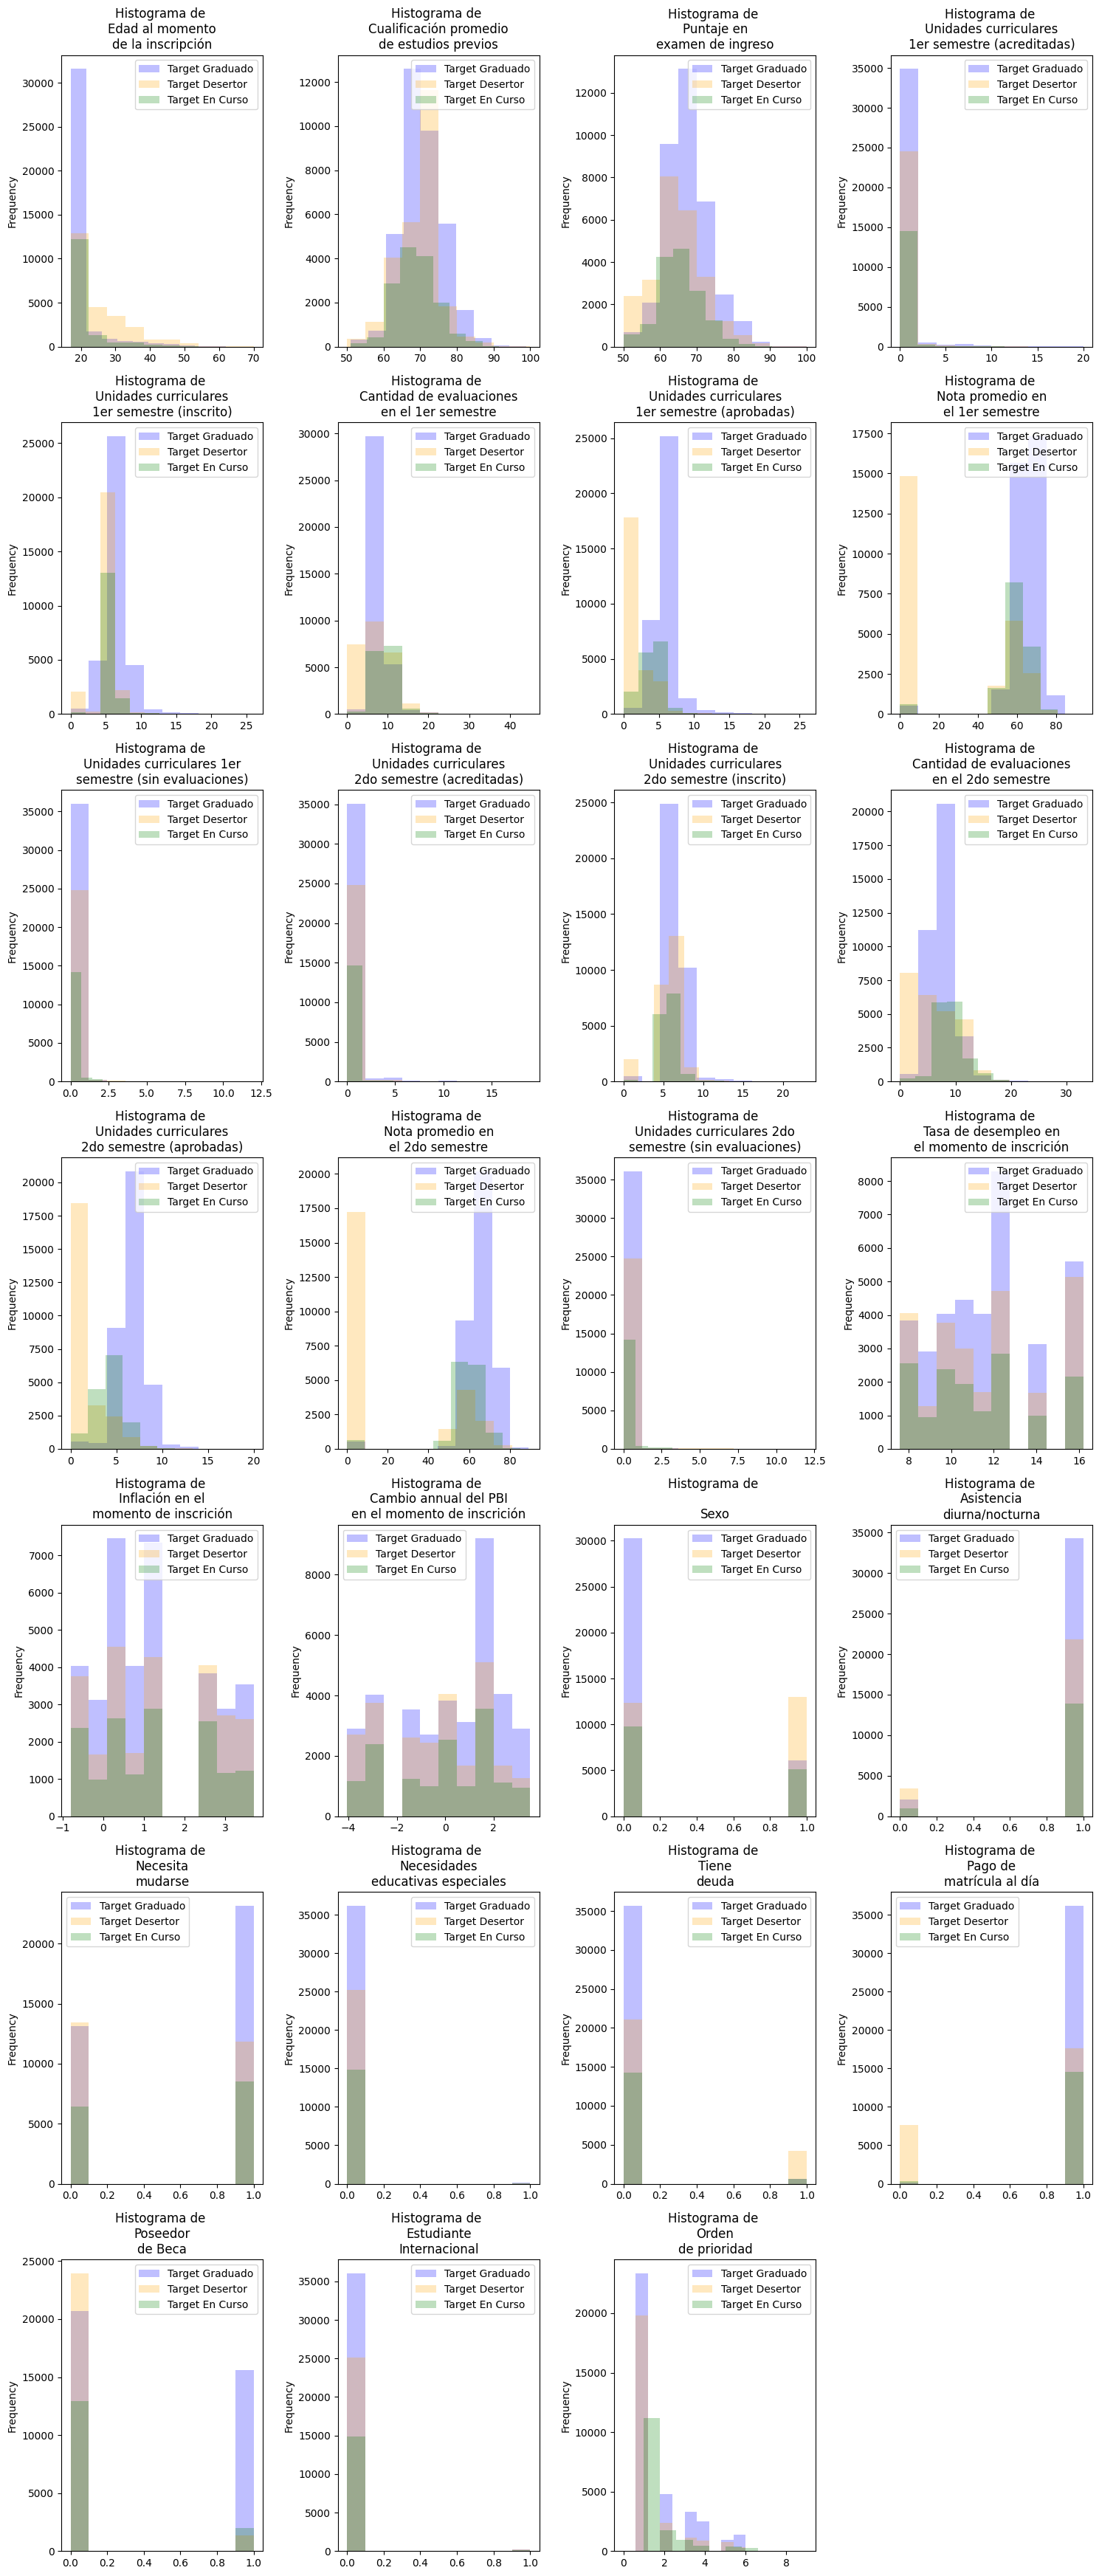

In [ ]:
# Definir colores para cada valor del target
colores = ['blue', 'orange', 'green']  # Ajusta los colores según tus valores de target

# Obtener los valores únicos del Target
valores_target = datos['Target'].unique()

# Número de columnas que quieres (3 en este caso)
num_columnas = 4
a_considerar=numericas+booleanas+ordinales+['Target']
data=datos[a_considerar]
# Calcular el número de filas necesarias
num_filas = (len(data.columns) - 1 + num_columnas - 1) // num_columnas  # Ajusta para excluir 'Target'

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))
axes = axes.flatten()

# Crear un histograma para cada columna (excepto Target), por cada valor de Target
for i, columna in enumerate(data.columns):
    if columna != 'Target':
        for j, valor in enumerate(valores_target):
            subset = data[data['Target'] == valor]
            subset[columna].plot.hist(ax=axes[i], alpha=0.25, color=colores[j], label=f'Target {valor}')
        palabras = columna.split()  # Divide en palabras
        mitad = len(palabras) // 2  # Calcula el punto medio
        primera_parte = ' '.join(palabras[:mitad])  # Primera mitad de palabras
        segunda_parte = ' '.join(palabras[mitad:])  # Segunda mitad de palabras

        axes[i].set_title(f'Histograma de \n{primera_parte}\n{segunda_parte}')
        axes[i].legend()

# Eliminar gráficos en blanco si hay menos columnas que espacios disponibles
for i in range(len(data.columns)-1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig(f'{path}fig distribucion variables.png', dpi=300, bbox_inches='tight')  # Guarda como PNG
plt.show()

### Cantidad de datos unicos en ordinales y categoricas

In [ ]:
print ("categoricas")
print (datos[categoricas].nunique())
print ()
print ("Ordinales")
print (datos[ordinales].nunique())
print ()


categoricas
Estado Civil                                 6
Carrera                                     18
Ocupación de la Madre                       68
Ocupación del Padre                         56
Estudios máximos antes de la inscripción    21
Estudios de la Madre                        35
Estudios del Padre                          39
dtype: int64

Ordinales
Orden de prioridad    8
dtype: int64



### Codificar como one-hot las variables categoricas que se pueda

In [ ]:
columnas_dummies=['Estado Civil']
# Arma una lista con las variables que se van a crear y que pasan a ser booleanas
vars_a_crear=[]
for columna in columnas_dummies:
  rango_hasta=datos[columna].nunique()+1
  for n_variable in range(1, rango_hasta):
    variable=f"{columna}_{n_variable}"
    vars_a_crear.append(variable)
# Crea las dummies
datos=pd.get_dummies(datos, columns=columnas_dummies, dtype=int)
# Introduzco las variables recién creadasen booleanas
booleanas.extend(vars_a_crear)
# Elimina las variables del grupo en que estuvieran
for grupo in ['ordinales', 'categoricas', 'booleanas', 'numericas']:
  for columna in columnas_dummies:
    if columna in grupo:
      grupo.remove(columna)


### Corrección de ocupación: se volvió AN por Diseño Multimedia

In [ ]:
datos.loc[datos['Ocupación del Padre']=='Diseño Multimedia','Ocupación del Padre']='200'
datos.loc[datos['Ocupación de la Madre']=='Diseño Multimedia','Ocupación de la Madre']= '200'
datos['Ocupación del Padre']=datos['Ocupación del Padre'].astype(int)
datos['Ocupación de la Madre']=datos['Ocupación de la Madre'].astype(int)

### Conversión de los estudios (propios y de los padres) en ordinales

In [ ]:
traduccion_estudios_ordinal={
38:1,
19:2,
15:3,
14:4,
10:5,
12:6,
9:7,
1:8,
39:9,
42:10,
40:11,
6:11,
3:12,
2:13,
4:15,
43:15,
5:17,
}

In [ ]:
cols_estudios= ['Estudios máximos antes de la inscripción', 'Estudios de la Madre', 'Estudios del Padre']
for columna in cols_estudios:
  nueva_columna=f"{columna}_ordinal"
  print (f"Recodificando {columna} como  {nueva_columna}")
  en_dict=datos[columna].isin(traduccion_estudios_ordinal)
  datos[nueva_columna]=-1       # default para los desconocidos
  # Para los datos que estén, la nueva columna tendrá el valor que le da el diccionario
  datos.loc[en_dict, nueva_columna]=datos.loc[en_dict,columna].map(traduccion_estudios_ordinal)
  # Pone la nueva en ordinal
  ordinales.append(nueva_columna)

Recodificando Estudios máximos antes de la inscripción como  Estudios máximos antes de la inscripción_ordinal
Recodificando Estudios de la Madre como  Estudios de la Madre_ordinal
Recodificando Estudios del Padre como  Estudios del Padre_ordinal


## Correlaciones

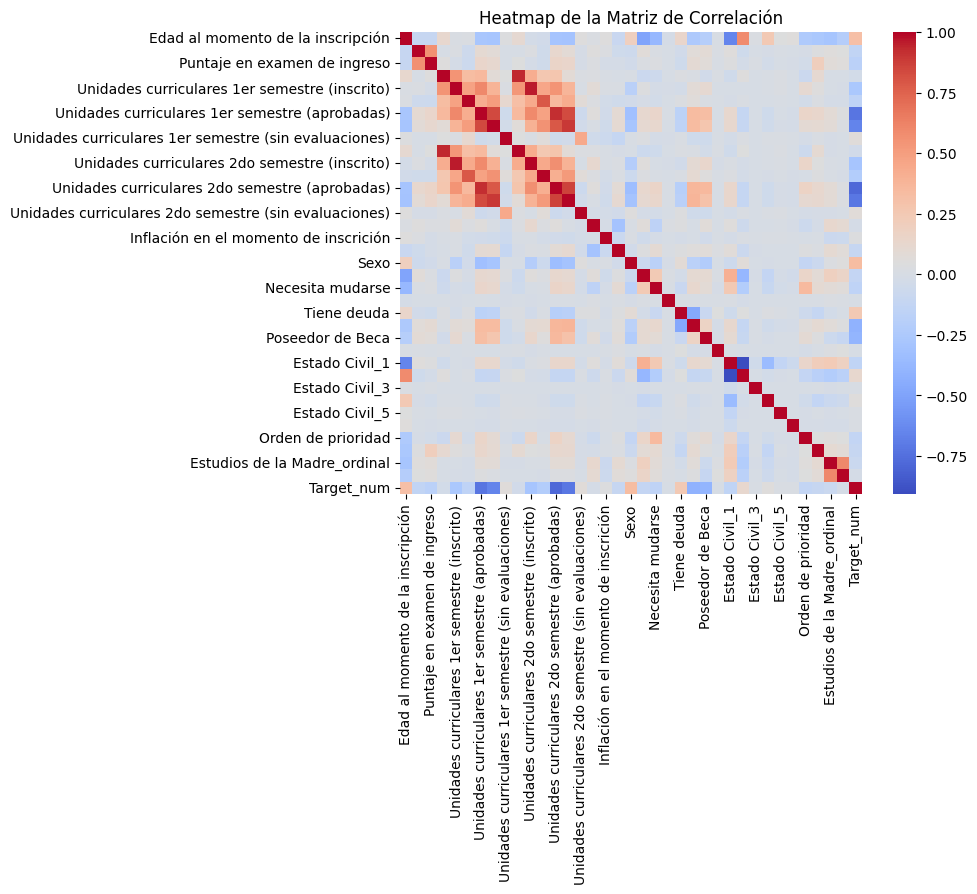

,Edad al momento de la inscripción,Cualificación promedio de estudios previos,Puntaje en examen de ingreso,Unidades curriculares 1er semestre (acreditadas),Unidades curriculares 1er semestre (inscrito),Cantidad de evaluaciones en el 1er semestre,Unidades curriculares 1er semestre (aprobadas),Nota promedio en el 1er semestre,Unidades curriculares 1er semestre (sin evaluaciones),Unidades curriculares 2do semestre (acreditadas),...,Estado Civil_2,Estado Civil_3,Estado Civil_4,Estado Civil_5,Estado Civil_6,Orden de prioridad,Estudios máximos antes de la inscripción_ordinal,Estudios de la Madre_ordinal,Estudios del Padre_ordinal,Target_num
Edad al momento de la inscripción,1.000000,-0.108419,-0.108829,0.122159,0.011152,0.019878,-0.277059,-0.288195,0.036600,0.111891,...,0.588254,0.016209,0.254290,0.045866,0.059552,-0.240258,-0.259894,-0.285435,-0.211730,0.320679
Cualificación promedio de estudios previos,-0.108419,1.000000,0.563344,-0.001059,0.016457,-0.062890,0.103289,0.079167,0.000290,-0.001439,...,-0.054303,-0.003038,-0.009562,0.002216,-0.003788,-0.012707,0.031357,0.055756,0.039672,-0.137686
Puntaje en examen de ingreso,-0.108829,0.563344,1.000000,0.050285,-0.017629,-0.067938,0.140612,0.119926,-0.000692,0.044788,...,-0.024309,0.012777,-0.030780,-0.000116,-0.011305,-0.035489,0.208962,0.074060,0.058110,-0.173312
Unidades curriculares 1er semestre (acreditadas),0.122159,-0.001059,0.050285,1.000000,0.549256,0.332080,0.356888,0.080358,0.041958,0.933935,...,0.047347,-0.002324,0.007615,0.022033,-0.001878,-0.073493,0.111168,-0.003714,-0.003267,-0.035764
Unidades curriculares 1er semestre (inscrito),0.011152,0.016457,-0.017629,0.549256,1.000000,0.484462,0.599526,0.387980,0.021245,0.531755,...,-0.003402,-0.002846,0.005982,0.018804,-0.003365,0.109712,0.052909,-0.005226,-0.008265,-0.263657
Cantidad de evaluaciones en el 1er semestre,0.019878,-0.062890,-0.067938,0.332080,0.484462,1.000000,0.418769,0.500992,0.120004,0.317123,...,0.014646,-0.003771,-0.000392,0.006236,-0.005110,-0.029603,0.016557,-0.019234,-0.020747,-0.152398
Unidades curriculares 1er semestre (aprobadas),-0.277059,0.103289,0.140612,0.356888,0.599526,0.418769,1.000000,0.839519,-0.055343,0.345784,...,-0.112528,-0.003987,-0.051552,-0.004337,-0.015291,0.143060,0.131894,0.084005,0.032077,-0.725490
Nota promedio en el 1er semestre,-0.288195,0.079167,0.119926,0.080358,0.387980,0.500992,0.839519,1.000000,-0.035531,0.073135,...,-0.108734,0.000201,-0.047251,-0.011696,-0.016856,0.097241,0.105446,0.078759,0.023087,-0.661052
Unidades curriculares 1er semestre (sin evaluaciones),0.036600,0.000290,-0.000692,0.041958,0.021245,0.120004,-0.055343,-0.035531,1.000000,0.042009,...,0.016644,0.000161,0.012342,0.013385,0.001453,-0.018316,0.010575,-0.009144,-0.000783,0.060941
Unidades curriculares 2do semestre (acreditadas),0.111891,-0.001439,0.044788,0.933935,0.531755,0.317123,0.345784,0.073135,0.042009,1.000000,...,0.043679,-0.002122,0.007847,0.020180,-0.001831,-0.066853,0.101467,-0.006691,-0.005751,-0.038062


In [ ]:
a_considerar=numericas+booleanas+ordinales
data=datos[a_considerar]
data.loc[:,['Target_num'] ]= datos['Target'].map({'Graduado':-1, 'En Curso':0, 'Desertor':1})
m_corr = data.corr()          # Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(m_corr, annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()
m_corr

### Correlaciones con algunas variables categóricas

Sospechamos que la deserción es desigual según las carreras

In [ ]:

tabla_porcentaje = pd.crosstab(datos['Carrera'], datos['Target'], normalize='index') * 100

# Mostrar la tabla
print(tabla_porcentaje)

Target                       Desertor   En Curso   Graduado
Carrera                                                    
39                         100.000000   0.000000   0.000000
979                        100.000000   0.000000   0.000000
Agronomía                   52.558264  19.501741  27.939995
Derecho                     19.735350  13.761815  66.502836
Diseño Multimedia           71.248688   7.275271  21.476041
Diseño de Comunicación      21.060652  14.843036  64.096312
Economía                    32.402755  25.423413  42.173832
Enfermería                  13.524930   9.243001  77.232069
Física                      75.000000  13.888889  11.111111
Gestión                     42.498729  31.649432  25.851839
Ingeniería Informática      59.820240  35.219707   4.960053
Periodismo y Comunicación   22.254687   9.739469  68.005844
Psicología                  36.554096  35.303315  28.142589
Publicidad y Marketing      33.991597  22.836134  43.172269
Química                     37.265416  1

# **MODELOS**

In [ ]:
def guarda_diccionario(diccionario, nombre_archivo):
    with open(nombre_archivo, 'wb') as archivo:
        pickle.dump(diccionario, archivo)

def carga_diccionario(nombre_archivo):
    with open(nombre_archivo, 'rb') as archivo:
        diccionario_cargado = pickle.load(archivo)
    return diccionario_cargado

def guarda_experimentos():
  guarda_diccionario(experimentos, path+"experimentos.pkl")
def carga_experimentos():
  experimentos= carga_diccionario(path+"experimentos.pkl")
  return experimentos


In [ ]:
#experimentos={}     # Los datos de todos los experimentos se almacenan en este diccionario
experimentos=carga_experimentos()

# Modelos con target Binario

## Preparación

Para la binarización del Target se evaluaron dos posibilidades:

1- Codificar únicamente los “Desertó” como 1, que es el target de interés, porque no hay evidencia de que los “En Curso” finalmente desertaran.

2- Codificar como 1 también a los “En Curso”, de modo que entren en el conjunto que merece atención.


A falta de más información, optamos por la 2da opción. Evaluamos que la 1era opción podría ser problemática al quedarnos sólo con prototipos extremos y ante nuevos casos a predecir, podrían faltarnos datos de entrenamiento similares. Además, no solo nos permite agrandar la muestra sino que nos parece interesante que este grupo es el que potencialmente necesita ayuda: algunos para no desertar, otros para terminar la carrera a tiempo.

In [ ]:
datos_binario = datos.copy()
datos_binario['Target'] = datos_binario['Target'].map({'Desertor': 1, 'Graduado': 0, 'En Curso': 1}).astype(int)


### Balanceo
Elegimos hacerlo por subsampleo para evitar duplicar artificialmente registros con el posible impacto que esto tendría

In [ ]:
casos_0 = datos_binario[datos_binario['Target'] == 0]
casos_1 = datos_binario[datos_binario['Target'] == 1]
casos_1_sampleados = casos_1.sample(n=len(casos_0), random_state=42)
data = pd.concat([casos_1_sampleados, casos_0])
data.value_counts('Target')

,count
Target,
0,36282
1,36282


### Preparación de train y test

In [ ]:
X = data[numericas+ordinales+booleanas]
y = data['Target']

En previsión de que hay modelos que requieren datos normalizados, vamos a trabajar todos ellos con datos normalizados.

In [ ]:
#Split y escalado
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regresión logística

In [ ]:
experimento = {}      # Los datos de cada experimento se almacenan en  un diccionario
caso="rl"
nombre_caso="Regresión Logística"
experimento['Target']='binario'
experimento['nombre']=nombre_caso



### Complejidad

El valor de C que dio la mayor accuracy es: 11.288378916846883
La accuracy en test correspondiente es: 0.8828663298116675


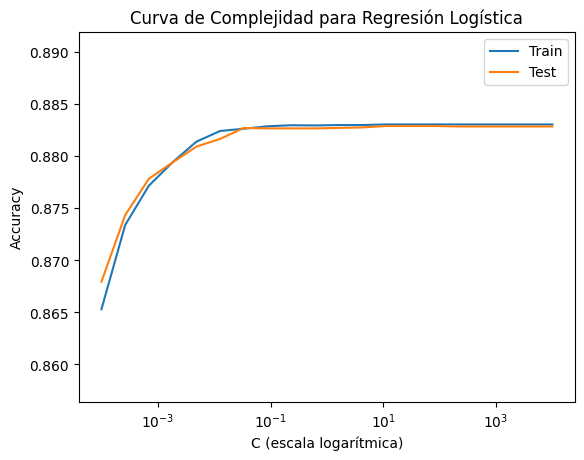

In [ ]:
 # Valores de C para probar
C_values = np.logspace(-4, 4, 20)
accuracy_en_train = []
accuracy_en_test = []
valores_de_c=[]

for C in C_values:
    valores_de_c.append(C)
    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Puntaje en el conjunto de entrenamiento
    accuracy_en_train.append(model.score(X_train_scaled, y_train))

    # Puntaje en el conjunto de validación
    accuracy_en_test.append(model.score(X_test_scaled, y_test))

indice_maximo = accuracy_en_test.index(max(accuracy_en_test))

# Obtener el valor de C correspondiente
c_optimo = valores_de_c[indice_maximo]
accuracy_optima = accuracy_en_test[indice_maximo]
print(f"El valor de C que dio la mayor accuracy es: {c_optimo}")
print(f"La accuracy en test correspondiente es: {accuracy_optima}")
# Graficar la curva de complejidad
max_accuracy=max(max(accuracy_en_test), max(accuracy_en_train))
min_accuracy=min(min(accuracy_en_test), min(accuracy_en_train))
rango_accuracy=max_accuracy-min_accuracy
max_escala=max_accuracy+0.5*rango_accuracy
min_escala=min_accuracy-0.5*rango_accuracy
y_lim=[min_escala, max_escala]
plt.ylim(y_lim)
plt.plot(C_values, accuracy_en_train, label="Train")
plt.plot(C_values, accuracy_en_test, label="Test")
plt.xscale('log')
plt.xlabel('C (escala logarítmica)')
plt.ylabel('Accuracy')
plt.title(f"Curva de Complejidad para {nombre_caso}")
plt.legend()
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG
plt.show()

In [ ]:
f'{path}complejidad {nombre_caso}.png'

'/content/drive/MyDrive/Data Science y similares/Maestría Data Mining Exactas/AA/aa_mio/TP1/AA_tp1_eq1/complejidad Regresión Logística.png'

### Reentrenar con el óptimo

In [ ]:
  # Vamos a trabajar con el mejor valor posible, aunque son todos muy similares
experimento['Hiperparámetros']=f"C = {c_optimo}"
lr = LogisticRegression(C=c_optimo, max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
y_train_pred=lr.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred)
experimento['recall']=recall_score(y_test, y_pred)
experimento['f1']=f1_score(y_test, y_pred)
experimento['modelo']=lr


### Importancia de variables

Puesto que normalizamos las variables, podemos usar los coeficientes como forma de identificar la importancia de cada variable

En rojo las variables con impacto negativo


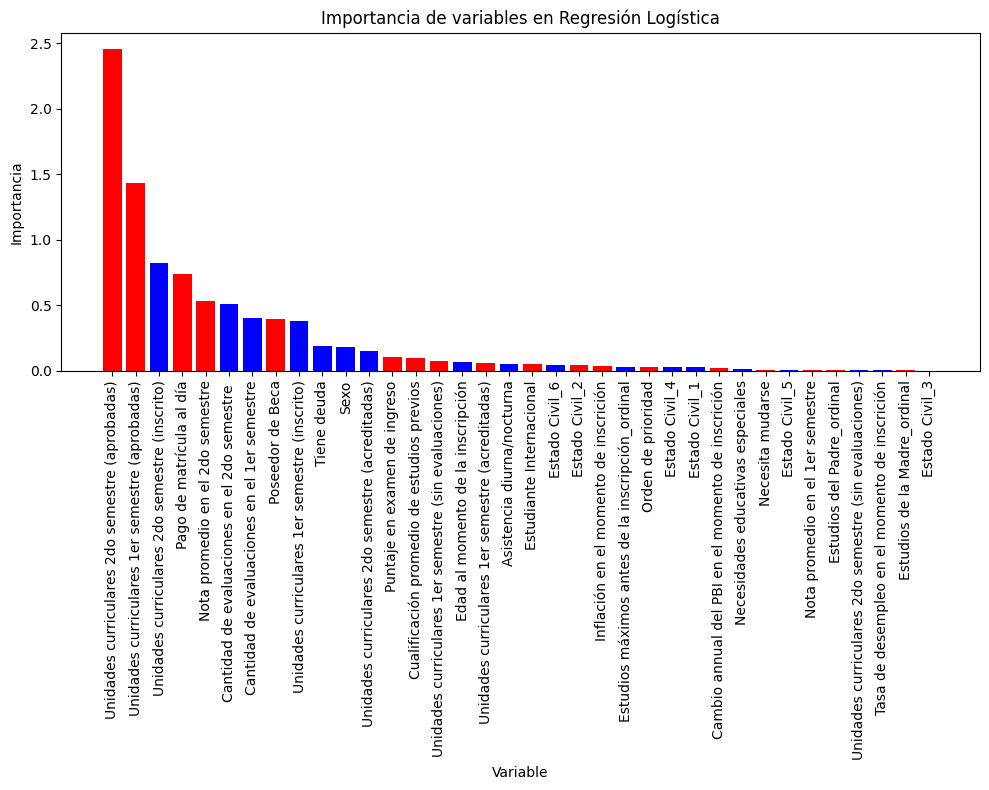

In [ ]:
lr_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(lr.coef_[0]),
    'Signo': np.sign(lr.coef_[0])  # Usamos np.sign para obtener el signo
})

lr_importancia = lr_importancia.sort_values(by='Importancia', ascending=False)
y_intercept=lr.intercept_


experimento['Importancia_variables']=lr_importancia

# Graficar las importancias de las características con nombres
colors = ['blue' if signo == 1 else 'red' for signo in lr_importancia['Signo']]

plt.figure(figsize=(10, 8))
plt.bar(lr_importancia['Variable'], lr_importancia['Importancia'], color=colors)
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
print ("En rojo las variables con impacto negativo")
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()



### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento

{'Target': 'binario',
 'nombre': 'Regresión Logística',
 'Hiperparámetros': 'C = 4.281332398719396',
 'accuracy_train': 0.8813442532582588,
 'accuracy': 0.8811667432246211,
 'precision': 0.9051942979886741,
 'recall': 0.8515660879948562,
 'f1': 0.8775616451322826,
 'modelo': LogisticRegression(C=4.281332398719396, max_iter=5000),
 'Importancia_variables':                                              Variable  Importancia  Signo
 12     Unidades curriculares 2do semestre (aprobadas)     2.455200   -1.0
 6      Unidades curriculares 1er semestre (aprobadas)     1.429828   -1.0
 10      Unidades curriculares 2do semestre (inscrito)     0.823963    1.0
 27                           Pago de matrícula al día     0.739912   -1.0
 13                   Nota promedio en el 2do semestre     0.531502   -1.0
 11       Cantidad de evaluaciones en el 2do semestre      0.508205    1.0
 5         Cantidad de evaluaciones en el 1er semestre     0.397881    1.0
 28                                   Posee

In [ ]:
guarda_experimentos()

## Arbol de decisión


In [ ]:
experimentos=carga_experimentos()
experimento={}      # Los datos de cada experimento se almacenan en  un diccionario
caso="dt"
nombre_caso='Arbol de decisión'
experimento['Target']="binario"
experimento['nombre']=nombre_caso

### Optimización

Vamos a optimizar hiperparámetros. Luego mostraremos curvas de complejidad para las variables significativas

In [ ]:
# Optimización de hiperparámetros
modelo_a_optimizar = DecisionTreeClassifier()

param_dist = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 7, 10, 20, 30 , None],
    'max_features': [None],
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
#    'ccp_alpha': expon(scale=0.1)
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(modelo_a_optimizar, param_distributions=param_dist, n_iter=200, cv=skf, scoring='accuracy', random_state=42)
search.fit(X_train_scaled, y_train)
params=search.best_params_
print("\nMejores hiperparámetros:", params)
print("Mejor precisión:", search.best_score_)


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 40, 'min_samples_split': 17}
Mejor precisión: 0.8772690011452285


### Complejidad

Una variable clave para la complejidad de un arbol es su profundidad. Vamos a mantener los demás hiperparámetros y ver cómo responde el modelo a la profundidad del árbol



El valor de Max_depth que dio la mayor accuracy es: 15
La accuracy en test correspondiente es: 0.8765273311897106


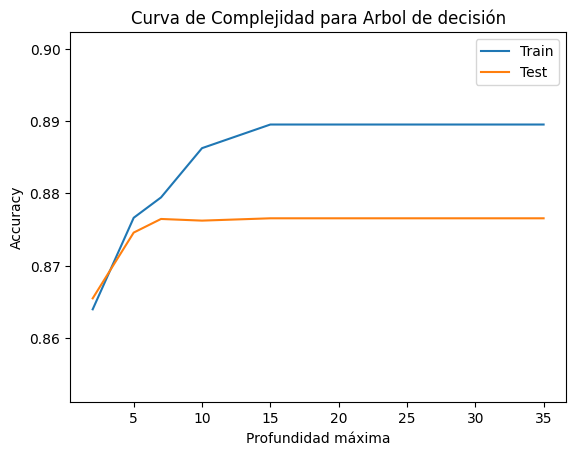

In [ ]:
 # Valores de  max_depth para probar
max_depth_values = [2, 5, 7, 10, 15, 20, 25, 30, 35, None ]
accuracy_en_train = []
accuracy_en_test = []
valores_de_hiper=[]

for max_depth in max_depth_values:
    valores_de_hiper.append(max_depth)
    # De los parámetros optimizados, sólo se cambia el max_depth para la curva
    params['max_depth']=max_depth
    model=DecisionTreeClassifier(**params,
                           random_state=42
                           )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Puntaje en el conjunto de entrenamiento
    accuracy_en_train.append(model.score(X_train_scaled, y_train))

    # Puntaje en el conjunto de validación
    accuracy_en_test.append(model.score(X_test_scaled, y_test))

indice_maximo = accuracy_en_test.index(max(accuracy_en_test))

# Obtener el valor del hiperparámetro correspondiente
hiper_optimo = valores_de_hiper[indice_maximo]
accuracy_optima = accuracy_en_test[indice_maximo]
print(f"El valor de Max_depth que dio la mayor accuracy es: {hiper_optimo}")
print(f"La accuracy en test correspondiente es: {accuracy_optima}")
# Graficar la curva de complejidad
max_accuracy=max(max(accuracy_en_test), max(accuracy_en_train))
min_accuracy=min(min(accuracy_en_test), min(accuracy_en_train))
rango_accuracy=max_accuracy-min_accuracy
max_escala=max_accuracy+0.5*rango_accuracy
min_escala=min_accuracy-0.5*rango_accuracy
y_lim=[min_escala, max_escala]
plt.ylim(y_lim)
plt.plot(valores_de_hiper, accuracy_en_train, label="Train")
plt.plot(valores_de_hiper, accuracy_en_test, label="Test")
plt.xscale('linear')
plt.xlabel('Profundidad máxima')
plt.ylabel('Accuracy')
plt.title(f"Curva de Complejidad para {nombre_caso}")
plt.legend()
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()



### Reentrenar con el óptimo

In [ ]:
# Vamos a trabajar con el mejor valor posible, aunque son todos muy similares
experimento['Hiperparámetros']=f"max_depth = {hiper_optimo}"
params['max_depth']=max_depth
model=DecisionTreeClassifier(**params,
                        random_state=42
                        )
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
y_train_pred=model.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred)
experimento['recall']=recall_score(y_test, y_pred)
experimento['f1']=f1_score(y_test, y_pred)
experimento['modelo']=model


### Importancia de variables


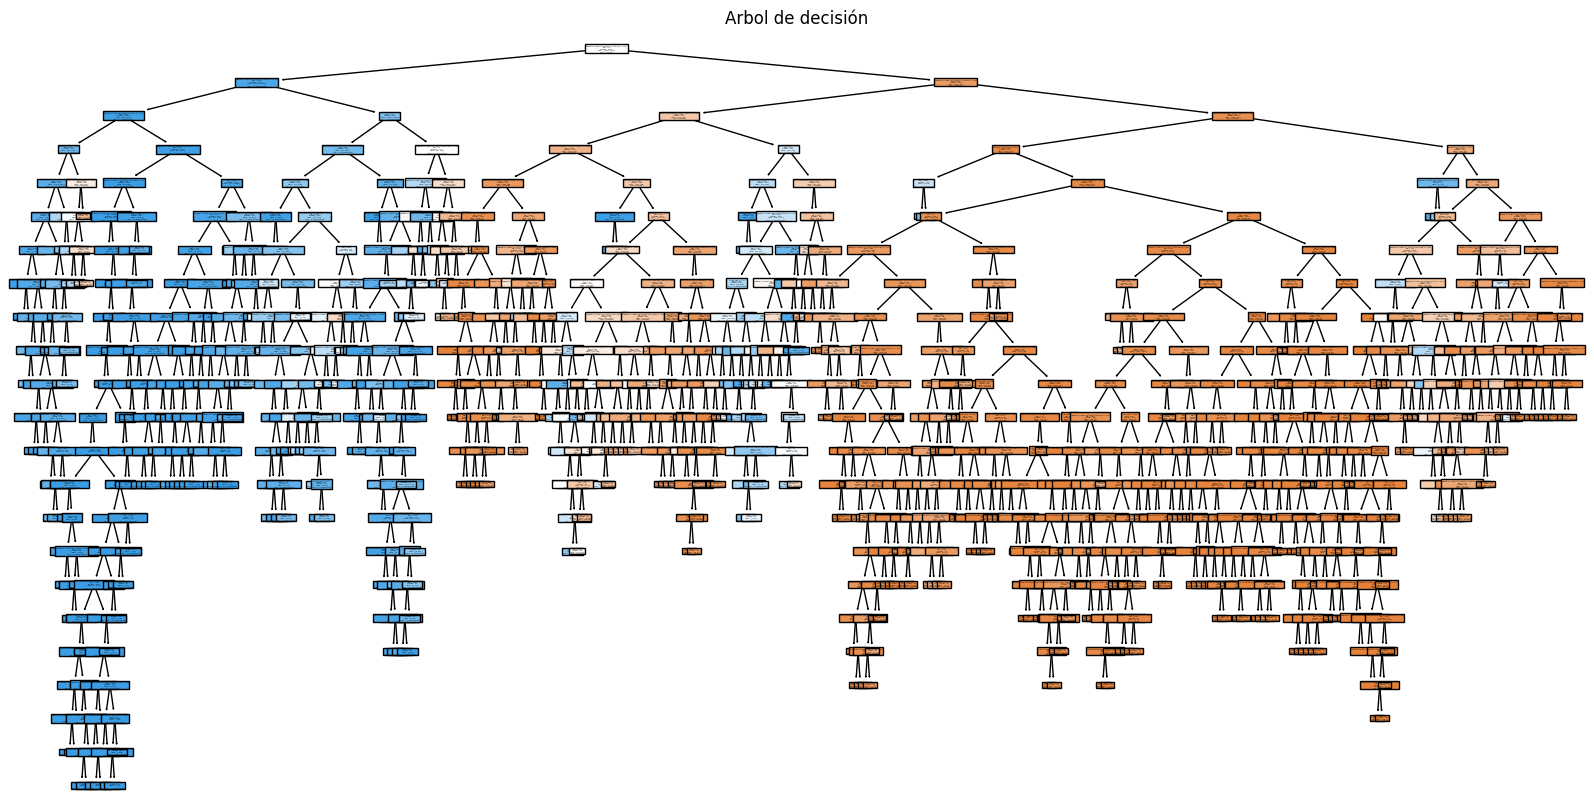

In [ ]:
# Plot
features=X_train.columns
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=features, class_names=['Graduado', 'Abandonó/Continúa'])
plt.title("Arbol de decisión")
plt.savefig(f'{path}fig Arbol de decisión - caso binario.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


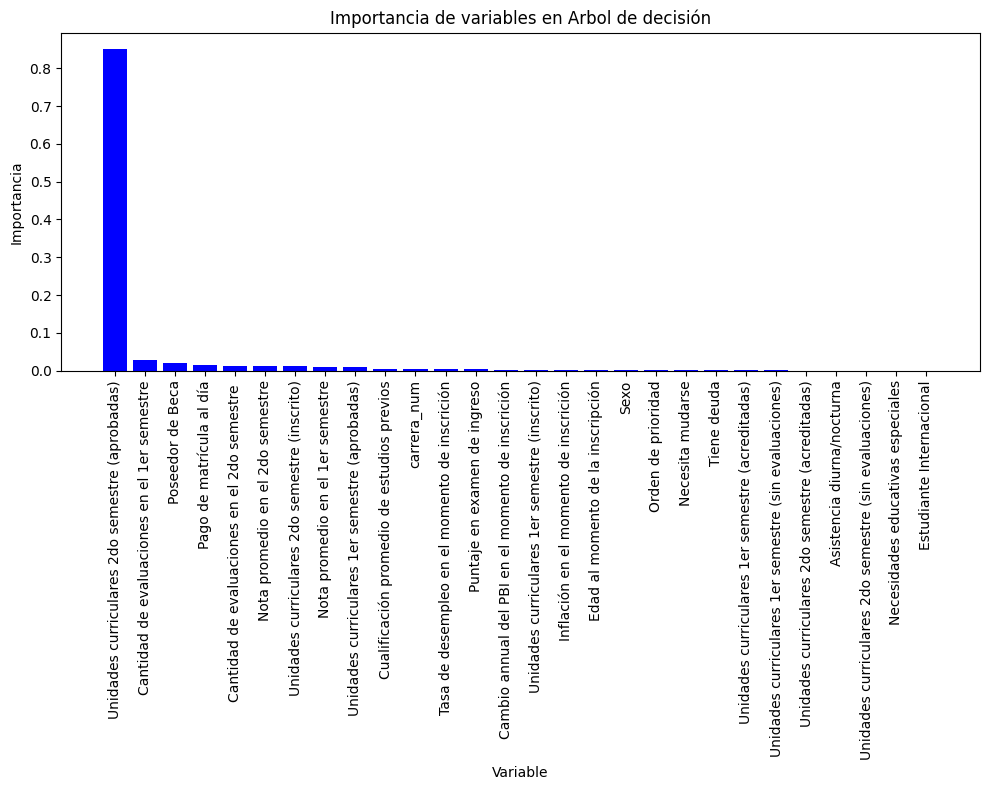

In [ ]:
dt_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(model.feature_importances_),
    'Signo': np.sign(model.feature_importances_)
    })
dt_importancia=dt_importancia.sort_values(by='Importancia', ascending=False)
experimento['Importancia_variables']=dt_importancia


# Graficar las importancias de las características con nombres
colors = ['blue' if signo == 1 else 'red' for signo in dt_importancia['Signo']]

plt.figure(figsize=(10, 8))
plt.bar(dt_importancia['Variable'], dt_importancia['Importancia'], color=colors)
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento

{'Target': 'binario',
 'nombre': 'Arbol de decisión',
 'Hiperparámetros': 'max_depth = 15',
 'accuracy_train': 0.8894948222230972,
 'accuracy': 0.8765273311897106,
 'precision': 0.8978165938864628,
 'recall': 0.849820887296776,
 'f1': 0.8731596828992072,
 'modelo': DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=17,
                        random_state=42),
 'Importancia_variables':                                              Variable  Importancia  Signo
 12     Unidades curriculares 2do semestre (aprobadas)     0.851423    1.0
 5         Cantidad de evaluaciones en el 1er semestre     0.028432    1.0
 27                                   Poseedor de Beca     0.019675    1.0
 26                           Pago de matrícula al día     0.013811    1.0
 11       Cantidad de evaluaciones en el 2do semestre      0.012826    1.0
 13                   Nota promedio en el 2do semestre     0.012290    1.0
 10      Unidades curriculares 2do semestre (inscrito)     0.011021    1.0
 

In [ ]:
guarda_experimentos()


## Support Vector Machines

In [ ]:
experimentos=carga_experimentos()
experimento={}
caso="svm"
nombre_caso="Support Vector Machine"
experimento['Target']='binario'
experimento['nombre']=nombre_caso

### Complejidad

In [ ]:
 # Valores de C para probar
C_values = [0.01, 0.03, 0.06, 0.1,  0.5, 0.7, 1, 10]
accuracy_en_train = []
accuracy_en_test = []
valores_de_c=[]

for C in C_values:
    print(f"Probando con C={C}")
    valores_de_c.append(C)
    model = SVC(kernel='linear', random_state=42, C=C)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Puntaje en el conjunto de entrenamiento
    accuracy_en_train.append(model.score(X_train_scaled, y_train))

    # Puntaje en el conjunto de validación
    accuracy_en_test.append(model.score(X_test_scaled, y_test))



Probando con C=0.01
Probando con C=0.03
Probando con C=0.06
Probando con C=0.1
Probando con C=0.5
Probando con C=0.7
Probando con C=1
Probando con C=10


El valor de C que dio la mayor accuracy es: 0.01
La accuracy en test correspondiente es: 0.8862348798040116


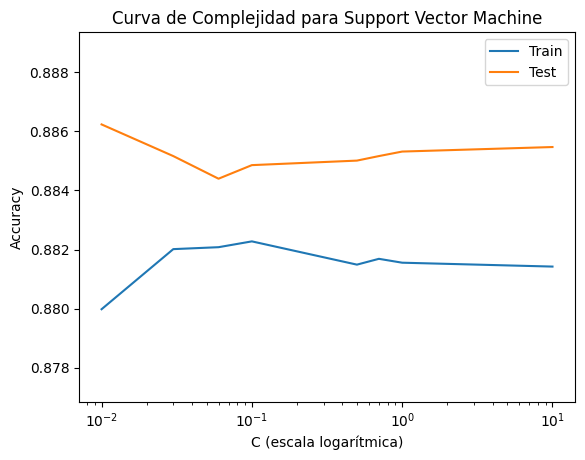

In [ ]:
indice_maximo = accuracy_en_test.index(max(accuracy_en_test))

# Obtener el valor de C correspondiente
c_optimo = valores_de_c[indice_maximo]
accuracy_optima = accuracy_en_test[indice_maximo]
print(f"El valor de C que dio la mayor accuracy es: {c_optimo}")
print(f"La accuracy en test correspondiente es: {accuracy_optima}")
# Graficar la curva de complejidad
max_accuracy=max(max(accuracy_en_test), max(accuracy_en_train))
min_accuracy=min(min(accuracy_en_test), min(accuracy_en_train))
rango_accuracy=max_accuracy-min_accuracy
max_escala=max_accuracy+0.5*rango_accuracy
min_escala=min_accuracy-0.5*rango_accuracy
y_lim=[min_escala, max_escala]
plt.ylim(y_lim)
plt.plot(C_values, accuracy_en_train, label="Train")
plt.plot(C_values, accuracy_en_test, label="Test")
plt.xscale('log')
plt.xlabel('C (escala logarítmica)')
plt.ylabel('Accuracy')
plt.title(f"Curva de Complejidad para {nombre_caso}")
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.legend()
plt.show()

In [ ]:
  # Vamos a trabajar con el mejor valor posible, aunque son todos muy similares


c_optimo_svm=c_optimo
experimento['Hiperparámetros'] = f"C = {c_optimo_svm}"
svc = SVC(kernel = 'linear', C=c_optimo_svm, max_iter=5000, probability=True, verbose=True) #probability: para poder hacer el ensamble por voting
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
y_train_pred=svc.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy'] = accuracy_score(y_test, y_pred)
experimento['precision'] = precision_score(y_test, y_pred)
experimento['recall'] = recall_score(y_test, y_pred)
experimento['f1'] = f1_score(y_test, y_pred)
experimento['modelo'] = svc
print (f"Accuracy: {experimento['accuracy']}")


[LibSVM]Accuracy: 0.8862348798040116


### Importancia

En rojo las variables con impacto negativo


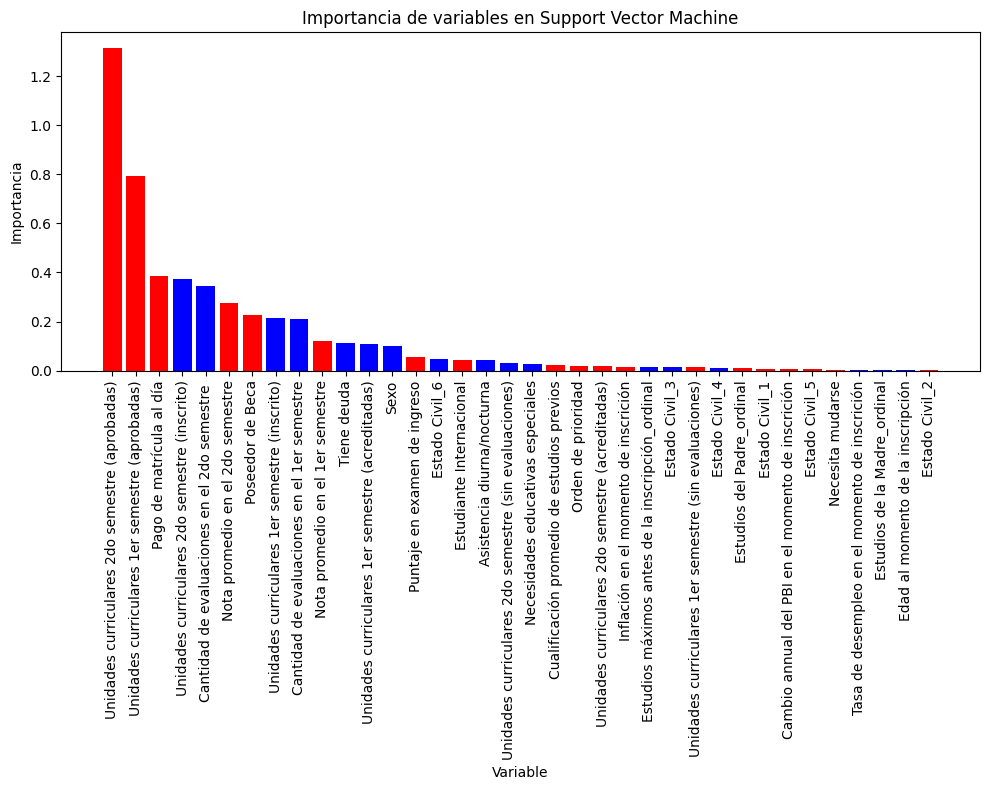

In [ ]:

svm_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(svc.coef_[0]),
    'Signo': np.sign(svc.coef_[0])  # Usamos np.sign para obtener el signo
})

svm_importancia = svm_importancia.sort_values(by='Importancia', ascending=False)
y_intercept=svc.intercept_


experimento['Importancia_variables']=svm_importancia

# Graficar las importancias de las características con nombres
colors = ['blue' if signo == 1 else 'red' for signo in svm_importancia['Signo']]

plt.figure(figsize=(10, 8))
plt.bar(svm_importancia['Variable'], svm_importancia['Importancia'], color=colors)
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
print ("En rojo las variables con impacto negativo")
plt.savefig(f'{path}fig importanciacomplejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()

### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento

{'Target': 'binario',
 'nombre': 'Support Vector Machine',
 'Hiperparámetros': 'C = 0.01',
 'accuracy_train': 0.879979001246801,
 'accuracy': 0.8862348798040116,
 'precision': 0.9193864229765013,
 'recall': 0.8502867491699366,
 'f1': 0.8834875333228791,
 'modelo': SVC(C=0.01, kernel='linear', max_iter=5000, probability=True, verbose=True),
 'Importancia_variables':                                              Variable  Importancia  Signo
 12     Unidades curriculares 2do semestre (aprobadas)     1.312920   -1.0
 6      Unidades curriculares 1er semestre (aprobadas)     0.794160   -1.0
 27                           Pago de matrícula al día     0.384289   -1.0
 10      Unidades curriculares 2do semestre (inscrito)     0.374503    1.0
 11       Cantidad de evaluaciones en el 2do semestre      0.344770    1.0
 13                   Nota promedio en el 2do semestre     0.277430   -1.0
 28                                   Poseedor de Beca     0.226092   -1.0
 4       Unidades curriculares 1e

In [ ]:
guarda_experimentos()

## ENSAMBLE  SOFT de modelos binarios

Se hace con el mismo conjunto de datos que se usó en SVM
(algo reducido, por razones computacionales)

---



In [ ]:
experimentos=carga_experimentos()

In [ ]:
experimento={}      # Los datos de cada experimento se almacenan en  un diccionario
caso="voting"
nombre_caso='Ensamble por Voting'
experimento['Target']="binario"
experimento['nombre']=nombre_caso
experimento['Hiperparámetros']="Ninguno"

In [ ]:
#@title Voting

voting_clf = VotingClassifier(
    estimators=[
        ('rl', LogisticRegression(C=4.281332398719396, max_iter=5000)),
        ('dt',DecisionTreeClassifier(ccp_alpha=0.0018240718598710017, criterion='entropy',
                        max_features=3, min_samples_leaf=3, random_state=42)),
        ('svm',SVC(kernel = 'linear', C=0.01, probability=True) )
    ],
    voting='soft'
)
experimento['Hiperparámetros']=f"Voting soft, modelos rl, dt, svm"
voting_clf.fit(X_train_scaled, y_train)
y_pred=voting_clf.predict(X_test_scaled)
y_train_pred=voting_clf.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred)
experimento['recall']=recall_score(y_test, y_pred)
experimento['f1']=f1_score(y_test, y_pred)
experimento['modelo']=voting_clf


In [ ]:
voting_clf.named_estimators

{'rl': LogisticRegression(C=4.281332398719396, max_iter=5000),
 'dt': DecisionTreeClassifier(ccp_alpha=0.0018240718598710017, criterion='entropy',
                        max_features=3, min_samples_leaf=3, random_state=42),
 'svm': SVC(C=0.01, kernel='linear', probability=True)}

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  accuracy = clf.score(X_test_scaled,y_test)
  print(f"{name}: {accuracy:.3f}")
print (f"Voting: {experimento['accuracy']}")

rl: 0.885
dt: 0.834
svm: 0.886
Voting: 0.8830194457204104


### Importancia de variables

In [ ]:
importancias_exp=None
for nombre in experimentos:
  if nombre in ['rl', 'dt', 'svm']:
    iv=experimentos[nombre]['Importancia_variables']
    # Escalar los valores de 'Importancia'
    scaler = StandardScaler()
    iv['Importancia_absoluta']=np.abs(iv['Importancia'])
    iv['Importancia_scaled'] = scaler.fit_transform(iv[['Importancia_absoluta']])
    iv['Signo']=np.sign(iv['Importancia'])

    if importancias_exp is None:
      importancias_exp=iv
    else:
      importancias_exp=pd.concat([importancias_exp, iv])

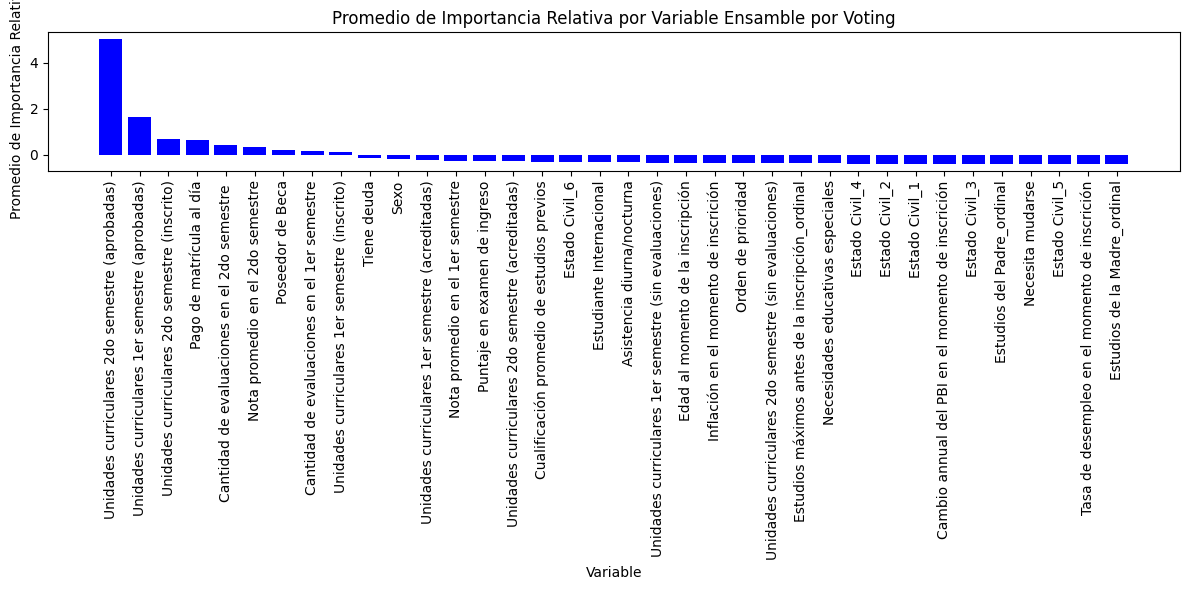

In [ ]:
# Calcular el promedio de 'Importancia_scaled' para cada 'Variable'
Importancia_variables = importancias_exp.groupby('Variable')['Importancia_scaled'].mean().reset_index()
Importancia_variables = Importancia_variables.rename(columns={'Importancia_scaled': 'Importancia'})
Importancia_variables['Signo']=1
Importancia_variables=Importancia_variables.sort_values(by='Importancia', ascending=False)
experimento['Importancia_variables']=Importancia_variables

# Crear el gráfico de barras
colors = ['blue' if signo == 1 else 'red' for signo in Importancia_variables['Signo']]
plt.figure(figsize=(12, 6))
plt.bar(Importancia_variables['Variable'], Importancia_variables['Importancia'], color=colors)
plt.xlabel('Variable')
plt.ylabel('Promedio de Importancia Relativa')
plt.title(f'Promedio de Importancia Relativa por Variable {nombre_caso}')
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.tight_layout()
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG
plt.show()

Aquí, por la forma de construcción, tenemos valores negativos y positivos. Eso resulta del hecho de que hicimos un escalado de las importancias obtenidas por cada método para hacerlas comparables. No debe leerse de la misma forma que los negativos en otros gráficos.


### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento




{'Target': 'binario',
 'nombre': 'Ensamble por Voting',
 'Hiperparámetros': 'Voting soft, modelos rl, dt, svm',
 'accuracy_train': 0.8808320755955115,
 'accuracy': 0.8830194457204104,
 'precision': 0.9086245591535749,
 'recall': 0.8554180501056444,
 'f1': 0.8812189054726368,
 'modelo': VotingClassifier(estimators=[('rl',
                               LogisticRegression(C=4.281332398719396,
                                                  max_iter=5000)),
                              ('dt',
                               DecisionTreeClassifier(ccp_alpha=0.0018240718598710017,
                                                      criterion='entropy',
                                                      max_features=3,
                                                      min_samples_leaf=3,
                                                      random_state=42)),
                              ('svm',
                               SVC(C=0.01, kernel='linear', probability=True))],
    

In [ ]:
guarda_experimentos()

# **Multiclase**

In [ ]:
experimentos=carga_experimentos()
datos_ternario = datos.copy()
datos_ternario['Target'] = datos_ternario['Target'].map({'Desertor': 1, 'Graduado': -1, 'En Curso': 0}).astype(int)
# Balanceo
min_class_count = datos_ternario['Target'].value_counts().min()
# Cambiamos la semilla para hacer otra división de datos diferente de la hecha para el caso binario
datos_ternario = datos_ternario.groupby('Target').apply(lambda x: x.sample(min_class_count, random_state=17)).reset_index(drop=True)
datos_ternario['Target'].value_counts()

<ipython-input-264-a8b7fcea82f2>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_ternario = datos_ternario.groupby('Target').apply(lambda x: x.sample(min_class_count, random_state=17)).reset_index(drop=True)


,count
Target,
-1,14940
0,14940
1,14940


In [ ]:
X = datos_ternario[numericas + ordinales + booleanas]
y = datos_ternario['Target']

# División en 3 categorías
#X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42, stratify=y_dev)
# División en 2 categorías
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
#X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

## KNN

### Optimización

In [ ]:
# Optimización de hiperparámetors


parameters = {
    'n_neighbors':[ 100, 50 , 40, 30, 20, 10, 5, 2],
    'weights': ['uniform', 'distance'],
    }
n_splits=5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
clf =  GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid=parameters,
                    cv=skf,
                    scoring='accuracy',
                    verbose=2,
                    n_jobs=-1)

clf.fit(X_train_scaled, y_train)


knn_best_params = clf.best_params_
print (knn_best_params)
experimento["Hiperparámetros"]=f"Optimo vecinos: {knn_best_params['n_neighbors']}   weights: {knn_best_params['weights']}"
knn = clf.best_estimator_
knn.fit(X_train_scaled, y_train)
print (clf.best_score_, clf.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'n_neighbors': 40, 'weights': 'distance'}
0.7561358518746182 {'n_neighbors': 40, 'weights': 'distance'}


In [ ]:
experimento={}
nombre_caso='knn'
caso='knn'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

 # Configurar los K-folds estratificados
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Realizar la validación cruzada
scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf)
# Mostrar los resultados
print(f"Scores en cada fold: {scores}")
print(f"Media del score: {np.mean(scores)}")
accuracy_train=np.mean(scores)


Scores en cada fold: [0.74135458 0.73832669 0.73545817 0.74135458 0.74561683]
Media del score: 0.7404221710543861


### Complejidad

En KNN la complejidad va a estar dada, aproximadamente, por la cantidad de vecinos pero en forma inversa:

Un k=pequeño se adapta a particularidades locales.
Un k muy alto, suaviza mucho las clasificaciones

In [ ]:
vecinos_values= [ 100, 50 , 40, 30, 20, 10, 5, 2]

print (f"Probando {len(vecinos_values)} valores de vecinos\n")
print (f"Casos a ensayar {vecinos_values}")
accuracy_en_train = []
accuracy_en_test = []
f1_en_train=[]
f1_en_test=[]
folds_f1=[]
folds_accuracy=[]
# f1_micro es idéntico a accuracy
valores_de_vecinos=[]
y_test_np=y_test.to_numpy()
ensayo=0

for vecinos in vecinos_values:
    ensayo += 1
    valores_de_vecinos.append(vecinos)
    print (f"Ensayo: {ensayo} con vecinos={vecinos}")
    # Crear el modelo KNN con el número de vecinos especificado
    knn = KNeighborsClassifier(n_neighbors=vecinos)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Puntaje en el conjunto de entrenamiento
    # Elegimos usar accuracy, porque los datos están balanceados
    scores_f1= cross_val_score(knn, X_train_scaled, y_train, cv=skf, scoring='f1_macro')
    scores_accuracy = cross_val_score(knn, X_train_scaled, y_train, cv=skf, scoring='accuracy')

    folds_f1.append(scores_f1)
    folds_accuracy.append(scores_accuracy)

    print (f"Scores del fold\nAccuracy: {scores_accuracy}\nF1: {scores_f1}\n")
    print (f"          Varianza de scores del folding: {np.var(scores_accuracy)}")
    # Puntajes en train
    acc_train=np.mean(scores_accuracy)
    f1_train=np.mean(scores_f1)

    # Puntaje en test
    # Entreno el modelo con todos los datos
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)

    acc_test=accuracy_score(y_test_np, y_pred)
    f1_test=f1_score(y_test_np, y_pred, average='macro')

    accuracy_en_train.append(acc_train)
    accuracy_en_test.append(acc_test)

    f1_en_train.append(f1_train)
    f1_en_test.append(f1_test)

    print (f"           accuracy_en_train:{acc_train} y en test {acc_test} ")
    print (f"           f1_macro_en_train:{f1_train} y en test {f1_test} ")
    print ("\n")
indice_maximo_acc = accuracy_en_test.index(max(accuracy_en_test))
indice_maximo_f1 = f1_en_test.index(max(f1_en_test))
vecinos_optimo_acc = valores_de_vecinos[indice_maximo_acc]
vecinos_optimo_f1= valores_de_vecinos[indice_maximo_f1]
accuracy_optima = accuracy_en_test[indice_maximo_acc]
f1_optima=f1_en_test[indice_maximo_f1]


experimento['Hiperparámetros']=f'Optimo de vecinos (según accuracy) {vecinos_optimo_acc}'




Probando 8 valores de vecinos

Casos a ensayar [100, 50, 40, 30, 20, 10, 5, 2]
Ensayo: 1 con vecinos=100
Scores del fold
Accuracy: [0.74151394 0.74358566 0.747251   0.74549801 0.74896398]
F1: [0.74398724 0.74674802 0.74979283 0.74845746 0.75182823]

          Varianza de scores del folding: 6.904795404156196e-06
           accuracy_en_train:0.7453625167801856 y en test 0.7483266398929049 
           f1_macro_en_train:0.7481627570810216 y en test 0.7511540137123444 


Ensayo: 2 con vecinos=50
Scores del fold
Accuracy: [0.74868526 0.75266932 0.75171315 0.74884462 0.75916481]
F1: [0.750735   0.75527348 0.75359585 0.75136775 0.76117496]

          Varianza de scores del folding: 1.4515321285072319e-05
           accuracy_en_train:0.7522154315476379 y en test 0.7541276215975011 
           f1_macro_en_train:0.7544294076039069 y en test 0.7564948391465857 


Ensayo: 3 con vecinos=40
Scores del fold
Accuracy: [0.75091633 0.75649402 0.75187251 0.75330677 0.75836787]
F1: [0.7528229  0.75887381 

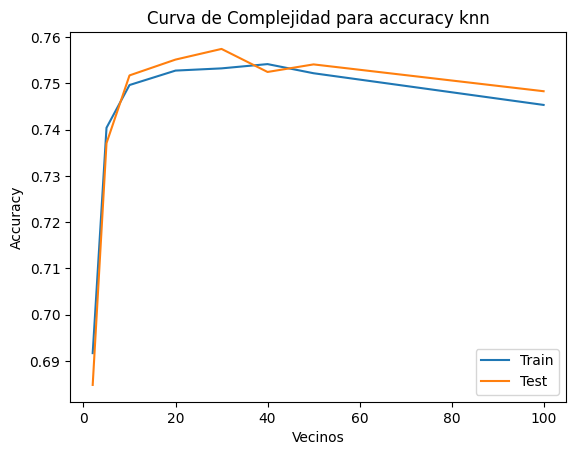

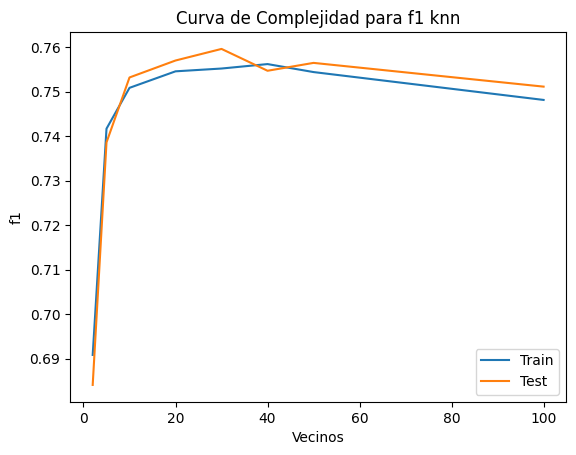

In [ ]:
# Graficar la curva de complejidad
plt.plot(vecinos_values, accuracy_en_train, label="Train")
plt.plot(vecinos_values, accuracy_en_test, label="Test")
plt.xlabel('Vecinos')
plt.ylabel('Accuracy')
plt.title(f"Curva de Complejidad para accuracy {nombre_caso}")
plt.legend()
plt.show()

plt.plot(vecinos_values, f1_en_train, label="Train")
plt.plot(vecinos_values, f1_en_test, label="Test")
plt.xlabel('Vecinos')
plt.ylabel('f1')
plt.title(f"Curva de Complejidad para f1 {nombre_caso}")
plt.legend()
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()



### Reentrenar con el óptimo

In [ ]:
knn = KNeighborsClassifier(**knn_best_params)
knn.fit(X_train_scaled, y_train)
experimento['modelo']=knn
y_pred=knn.predict(X_test_scaled)

# Puntaje en el conjunto de entrenamiento
# Elegimos usar accuracy, porque los datos están balanceados
y_train_pred=knn.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')


### Importancia de variables

En KNN no es aplicable

In [ ]:
experimento['Importancia_variables']=None

### Resultado

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento


{'Target': 'ternario',
 'nombre': 'knn',
 'Hiperparámetros': 'Optimo de vecinos (según accuracy) 30',
 'modelo': KNeighborsClassifier(n_neighbors=40, weights='distance'),
 'accuracy_train': 0.9998725058966023,
 'accuracy': 0.7568793693291685,
 'precision': 0.7687700412578676,
 'recall': 0.7568793693291685,
 'f1': 0.7591854415686283,
 'Importancia_variables': None}

In [ ]:
guarda_experimentos()

## Arbol de decisión


In [ ]:
experimentos= carga_experimentos()
experimento={}      # Los datos de cada experimento se almacenan en  un diccionario
caso="dt_t"
nombre_caso='Arbol de decisión -target ternario'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

### Optimización

Vamos a optimizar hiperparámetros. Luego mostraremos curvas de complejidad para las variables significativas

In [ ]:
# Optimización de hiperparámetros
modelo_a_optimizar = DecisionTreeClassifier()

param_dist = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 5, 7, 10, 20, 30 , None],
    'max_features': [None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
#   'ccp_alpha': expon(scale=0.1)
}
n_splits=5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
search = RandomizedSearchCV(modelo_a_optimizar, param_distributions=param_dist, n_iter=100, cv=skf, scoring='accuracy', random_state=42)
search.fit(X_train_scaled, y_train)
params=search.best_params_
print("\nMejores hiperparámetros:", params)
print("Mejor precisión:", search.best_score_)


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6}
Mejor precisión: 0.8760090036038719


### Complejidad

Una variable clave para la complejidad de un arbol es su profundidad. Vamos a mantener los demás hiperparámetros y ver cómo responde el modelo a la profundidad del árbol



El valor de Max_depth que dio la mayor accuracy es: 5
La accuracy en test correspondiente es: 0.8770326136885622


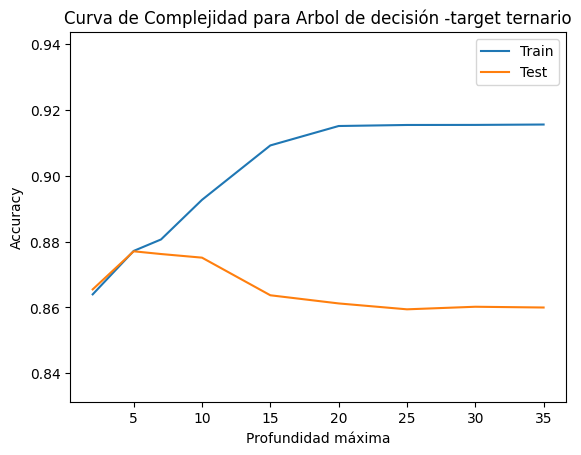

In [ ]:
 # Valores de  max_depth para probar
max_depth_values = [2, 5, 7, 10, 15, 20, 25, 30, 35, None ]
accuracy_en_train = []
accuracy_en_test = []
valores_de_hiper=[]

for max_depth in max_depth_values:
    valores_de_hiper.append(max_depth)
    # De los parámetros optimizados, sólo se cambia el max_depth para la curva
    params['max_depth']=max_depth
    model=DecisionTreeClassifier(**params,
                           random_state=42
                           )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Puntaje en el conjunto de entrenamiento
    accuracy_en_train.append(model.score(X_train_scaled, y_train))

    # Puntaje en el conjunto de validación
    accuracy_en_test.append(model.score(X_test_scaled, y_test))

indice_maximo = accuracy_en_test.index(max(accuracy_en_test))

# Obtener el valor del hiperparámetro correspondiente
hiper_optimo = valores_de_hiper[indice_maximo]
accuracy_optima = accuracy_en_test[indice_maximo]
print(f"El valor de Max_depth que dio la mayor accuracy es: {hiper_optimo}")
print(f"La accuracy en test correspondiente es: {accuracy_optima}")
# Graficar la curva de complejidad
max_accuracy=max(max(accuracy_en_test), max(accuracy_en_train))
min_accuracy=min(min(accuracy_en_test), min(accuracy_en_train))
rango_accuracy=max_accuracy-min_accuracy
max_escala=max_accuracy+0.5*rango_accuracy
min_escala=min_accuracy-0.5*rango_accuracy
y_lim=[min_escala, max_escala]
plt.ylim(y_lim)
plt.plot(valores_de_hiper, accuracy_en_train, label="Train")
plt.plot(valores_de_hiper, accuracy_en_test, label="Test")
plt.xscale('linear')
plt.xlabel('Profundidad máxima')
plt.ylabel('Accuracy')
plt.title(f"Curva de Complejidad para {nombre_caso}")
plt.legend()
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()



### Reentrenar con el óptimo

In [ ]:
# Vamos atrabajar con el mejor valor posible, aunque son todos muy similares
experimento['Hiperparámetros']=f"max_depth = {hiper_optimo}"
params['max_depth']=max_depth
model=DecisionTreeClassifier(**params,
                        random_state=42
                        )
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
y_train_pred=model.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')
experimento['modelo']=model


In [ ]:
# Plot
features=X_train.columns
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=features, class_names=['Graduado', 'Abandonó', 'Continúa'])
plt.title("Arbol de decisión ternario")
plt.savefig(f'{path}fig Arbol de decisión - caso ternario.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x782d6b0a8ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x782d6b0a8160> (for post_execute):


KeyboardInterrupt: 

### Importancia de variables


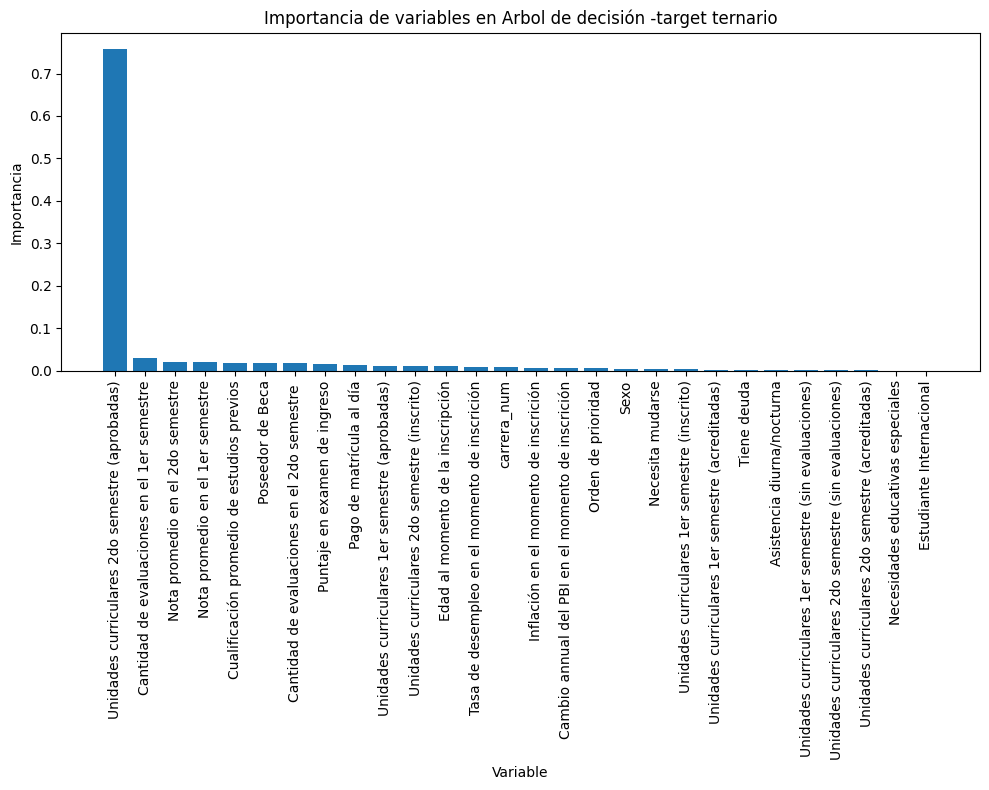

In [ ]:
dt_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(model.feature_importances_),
    'Signo': np.sign(model.feature_importances_)
    })


dt_importancia = dt_importancia.sort_values(by='Importancia', ascending=False)

experimento['Importancia_variables']=dt_importancia

plt.figure(figsize=(10, 8))
plt.bar(dt_importancia['Variable'], dt_importancia['Importancia'])
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento

{'Target': 'ternario',
 'nombre': 'Arbol de decisión -target ternario',
 'Hiperparámetros': 'max_depth = 5',
 'accuracy_train': 0.9155805803835099,
 'accuracy': 0.8599448782728526,
 'precision': 0.8607010478075516,
 'recall': 0.8599490851113847,
 'f1': 0.8598724318202149,
 'modelo': DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=6, random_state=42),
 'Importancia_variables':                                              Variable  Importancia  Signo
 12     Unidades curriculares 2do semestre (aprobadas)     0.758082    1.0
 5         Cantidad de evaluaciones en el 1er semestre     0.030707    1.0
 13                   Nota promedio en el 2do semestre     0.020372    1.0
 7                    Nota promedio en el 1er semestre     0.019208    1.0
 1          Cualificación promedio de estudios previos     0.017823    1.0
 27                                   Poseedor de Beca     0.017628    1.0
 11       Cantidad de evaluaciones en el 2do semestre      0.016826    1.0
 2       

In [ ]:
guarda_experimentos()

## Bagging: Random Forest

In [ ]:
experimentos=carga_experimentos()
experimento={}
nombre_caso='Random Forest'
caso='rf'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy training : 0.468
Accuracy test: 0.468


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Optimizacion



In [ ]:

param_distributions = {
    'n_estimators': range(50, 600, 10),  # Número de árboles
    'max_depth': range(5, 30, 5),          # Profundidad máxima del árbol
    'min_samples_split': range(2, 30, 2),  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': range(1, 30,  1),   # Mínimo de muestras para ser una hoja
    'bootstrap': [True, False]             # Muestreo con reemplazo o no
}
# Max features: usa el default, sqrt, que es apropiado para este caso.
# Usamos sqrt para que cada árbol tome otras features
max_iter=50
n_splits=3
n_jobs=1
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, n_jobs=n_jobs, scoring='accuracy',cv=skf, n_iter=max_iter, verbose=2)
clf.fit(X_train_scaled, y_train)
rf = clf.best_estimator_
best_params=clf.best_params_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(rf.score(X_train_scaled, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_test_scaled, y_test)))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=530; total time=  17.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=530; total time=  15.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=530; total time=  17.9s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=21, min_samples_split=18, n_estimators=400; total time=   6.6s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=21, min_samples_split=18, n_estimators=400; total time=   7.7s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=21, min_samples_split=18, n_estimators=400; total time=   6.1s
[CV] END bootstrap=True, max_depth=25, min_samples_leaf=22, min_samples_split=4, n_estimators=70; total time=   2.2s
[CV] END bootstrap=True, max_depth=25, min_samples_leaf=22, min_samples_split=4, n_estimators=70; total time= 

In [ ]:
print("Accuracy training : {:.3f}".format(rf.score(X_train_scaled, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_test_scaled, y_test)))

Accuracy training : 0.919
Accuracy test: 0.796


### Complejidad

Entrenando con max_depth=1
Entrenando con max_depth=5
Entrenando con max_depth=9
Entrenando con max_depth=13
Entrenando con max_depth=17
Entrenando con max_depth=21
Entrenando con max_depth=25
Entrenando con max_depth=29
Entrenando con max_depth=33


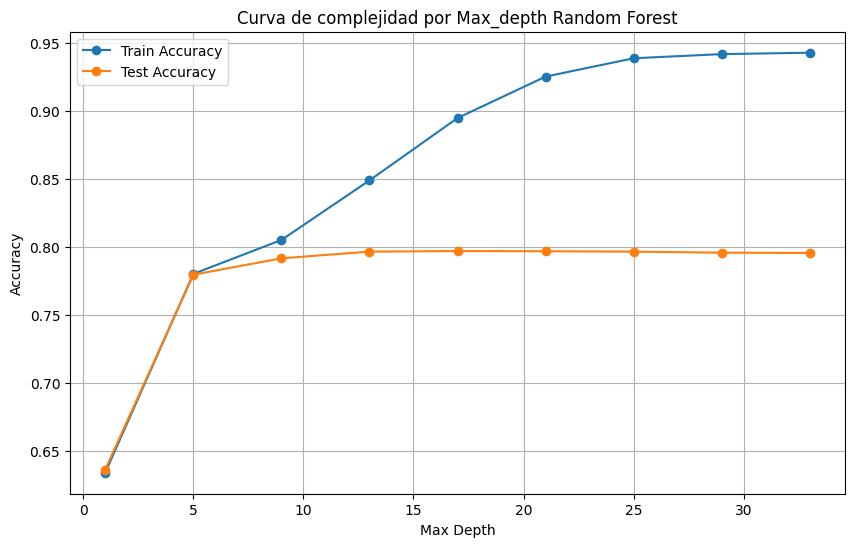

In [ ]:
#Rango de valores para max_depth (profundidad máxima)
max_depth_range = range(1, 35, 4)

#Listas para almacenar los puntajes de entrenamiento y prueba
train_scores = []
test_scores = []
max_depth_values = []

#Iterar sobre los valores de max_depth
for max_depth in max_depth_range:
    print(f"Entrenando con max_depth={max_depth}")
    max_depth_values.append(max_depth)
    # Crear un modelo de RandomForest con el max_depth actual
    params=best_params
    params['max_depth']=max_depth
    rf = RandomForestClassifier(**params, random_state=42)

#Ajustar el modelo a los datos de entrenamiento
    rf.fit(X_train_scaled, y_train)

#Predecir en el conjunto de entrenamiento y calcular la precisión
    y_train_pred = rf.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

#Predecir en el conjunto de prueba y calcular la precisión
    y_test_pred = rf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_range, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title(f'Curva de complejidad por Max_depth {nombre_caso}')
plt.legend()
plt.grid(True)
plt.savefig(f'{path}fig complejidad {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG
plt.show()

In [ ]:

experimento['Hiperparámetros']=clf.best_params_
experimento['modelo']=rf
y_pred=rf.predict(X_test_scaled)
# Puntaje en el conjunto de entrenamiento
# Elegimos usar accuracy, porque los datos están balanceados
y_train_pred=rf.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')


### Importancia de variables


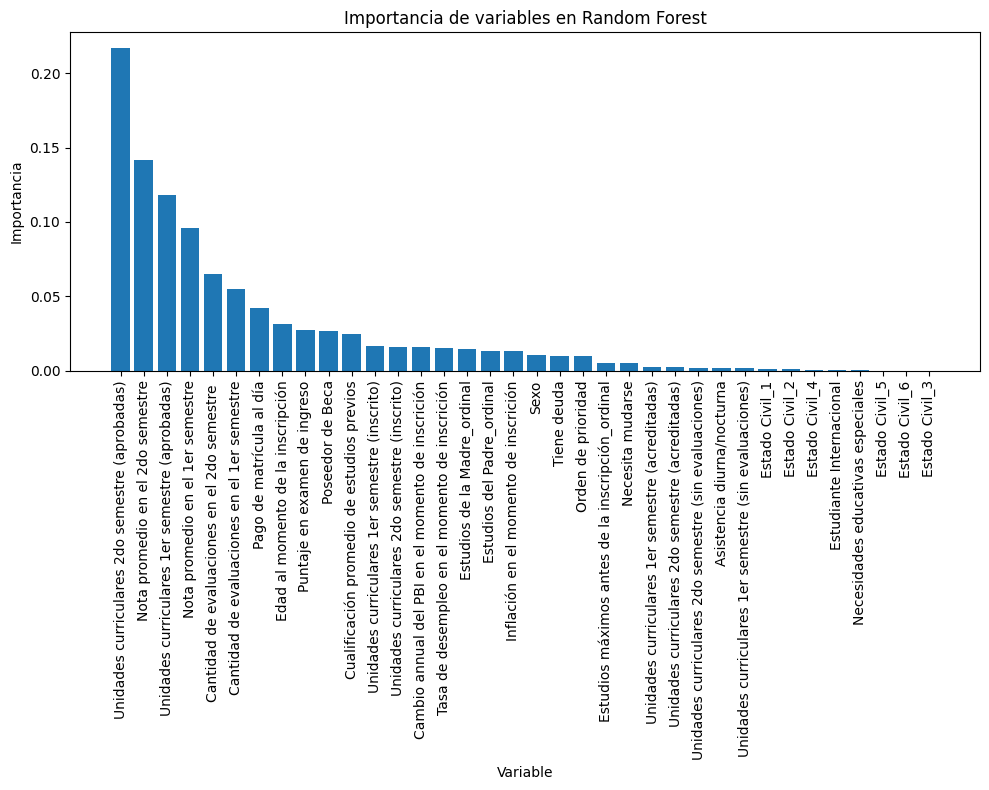

In [ ]:
dt_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(rf.feature_importances_),
    'Signo': np.sign(rf.feature_importances_)
    })


dt_importancia = dt_importancia.sort_values(by='Importancia', ascending=False)

experimento['Importancia_variables']=dt_importancia

plt.figure(figsize=(10, 8))
plt.bar(dt_importancia['Variable'], dt_importancia['Importancia'])
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


### Resultados

In [ ]:
# Fin del experimento
experimentos[caso]=experimento
experimento


{'Target': 'ternario',
 'nombre': 'Random Forest',
 'Hiperparámetros': {'n_estimators': 310,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 33,
  'bootstrap': False},
 'modelo': RandomForestClassifier(bootstrap=False, max_depth=33, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=310, random_state=42),
 'accuracy_train': 0.942627653471027,
 'accuracy': 0.7953294660121969,
 'precision': 0.8018259568963239,
 'recall': 0.7953294660121969,
 'f1': 0.7968909854763404,
 'Importancia_variables':                                              Variable  Importancia  Signo
 12     Unidades curriculares 2do semestre (aprobadas)     0.216647    1.0
 13                   Nota promedio en el 2do semestre     0.141422    1.0
 6      Unidades curriculares 1er semestre (aprobadas)     0.117826    1.0
 7                    Nota promedio en el 1er semestre     0.095609    1.0
 11       Cantidad de evaluaciones en el 2do semestre      0.065028    1.0
 5      

In [ ]:
guarda_experimentos()

## Bagging  de knn multiclase

In [ ]:
# BAGGING multiclase con knn
experimentos=carga_experimentos()
experimento={}
nombre_caso='Bagging con Knn multiclase'
caso='bg knn'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

###  Reentrenamiento con el óptimo

In [ ]:
#bg = BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors=0), n_estimators=50, max_samples=0.6, max_features=0.6, random_state=42)
bg = BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors=40, weights='distance'), max_samples=0.6, max_features=0.6, random_state=42)
# n_estimators nos dice cuantas veces queremos repetir el proceso
# max_samples en float nos dice que porcentaje del training set queremos remuestrear
# max_features nos da un grado mas de aleatorizacion, muestreo en las columnas/features del conjunto de datos

# fit
bg.fit(X_train_scaled, y_train)
y_pred=bg.predict(X_test_scaled)
experimento['Hiperparámetros']=f"n_estimators=10, n_neighbors=40, max_samples=0.5, max_features=0.6"
experimento['modelo']=bg
y_train_pred=bg.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')

# evaluación
print("Accuracy training : {:.3f}".format(bg.score(X_train_scaled, y_train)))
print("Accuracy test: {:.3f}".format(bg.score(X_test_scaled, y_test)))


Accuracy training : 0.964
Accuracy test: 0.768


### Resultados

In [ ]:
experimentos[caso]=experimento
experimento

{'Target': 'ternario',
 'nombre': 'Bagging con Knn multiclase',
 'Hiperparámetros': None,
 'modelo': BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=40,
                                                  weights='distance'),
                   max_features=0.6, max_samples=0.6, random_state=42),
 'accuracy_train': 0.9642379039969401,
 'accuracy': 0.7676632455748922,
 'precision': 0.7762775691791474,
 'recall': 0.7676632455748921,
 'f1': 0.7693336459662309}

In [ ]:
guarda_experimentos()

## Boosting: AdaBoost

In [ ]:
experimentos=carga_experimentos()
experimento={}
nombre_caso='Adaboost'
caso='adb'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

### Optimización

In [ ]:

# 1. Definir el clasificador AdaBoost
adb = AdaBoostClassifier(random_state=42)

# 2. Definir los hiperparámetros para la búsqueda de grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# 3. Configurar el GridSearchCV

n_splits=5
n_jobs=-1

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='f1_weighted', cv=skf, n_jobs=n_jobs)

# 4. Entrenar con la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 5. Imprimir los mejores parámetros encontrados
print("Parámetros optimizados:")
print(grid_search.best_params_)

# 6. Predecir con el mejor modelo encontrado
best_adb = grid_search.best_estimator_
y_pred_train = best_adb.predict(X_train_scaled)

# 7. Evaluar el rendimiento (Accuracy, Recall, F1) con average='macro' o 'weighted'

metrics = {
    "Accuracy": accuracy_score,
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    "F1 Score": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

print("\nPerformance on Training Data:")
for metric_name, metric in metrics.items():
    print(f"{metric_name}: {metric(y_train, y_pred_train):.4f}")



Parámetros optimizados:
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Performance on Training Data:
Accuracy: 0.7879
Recall: 0.7879
F1 Score: 0.7893


In [ ]:
adb=best_adb
y_pred=adb.predict(X_test_scaled)
experimento['Hiperparámetros']=grid_search.best_params_
experimento['modelo']=adb
y_train_pred=adb.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')


### Complejidad

### Resultados

In [ ]:
### Resultados
experimentos[caso]=experimento
experimento

{'Target': 'ternario',
 'nombre': 'Adaboost',
 'Hiperparámetros': {'algorithm': 'SAMME',
  'learning_rate': 1.0,
  'n_estimators': 200},
 'modelo': AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=42),
 'accuracy_train': 0.7879454325237458,
 'accuracy': 0.788041053101294,
 'precision': 0.7947413381453083,
 'recall': 0.7880410531012941,
 'f1': 0.7895815416151306}

In [ ]:
guarda_experimentos()

## Boosting Lightgbm

In [ ]:
experimentos=carga_experimentos()
experimento={}
nombre_caso='LightGbm'
caso='lgbm'
experimento['Target']="ternario"
experimento['nombre']=nombre_caso

### Optimización

In [ ]:
import lightgbm as lgb

# Supongamos que ya tienes tus datos en X e y
# X_train, X_val, y_train, y_val

# 1. Definir el clasificador LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)

# 2. Definir los hiperparámetros para la búsqueda de grid
param_grid = {
      'n_estimators': [100, 150, 200],
      'learning_rate': [0.01, 0.1, 0.5],
      'num_leaves': [31, 50, 100],
      'max_depth': [-1, 10, 20],
      'feature_fraction':[0.5, 0.75, 1.0],

}
n_splits=3
n_jobs=-1
# 3. Configurar el GridSearchCV
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='f1_weighted', cv=skf, n_jobs=n_jobs, verbose=1)

# 4. Entrenar con la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 5. Imprimir los mejores parámetros encontrados
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# 6. Predecir con el mejor modelo encontrado
best_lgbm = grid_search.best_estimator_
lgbm=best_lgbm
best_lgbm_params=grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 31374, number of used features: 34
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Parameters found by GridSearchCV:
{'feature_fraction': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


In [ ]:
y_pred=best_lgbm.predict(X_test_scaled)
experimento['Hiperparámetros']=best_lgbm_params
experimento['modelo']=lgbm
y_train_pred=lgbm.predict(X_train_scaled)
experimento['accuracy_train']=accuracy_score(y_train, y_train_pred)
experimento['accuracy']=accuracy_score(y_test, y_pred)
experimento['precision']=precision_score(y_test, y_pred, average='macro')
experimento['recall']=recall_score(y_test, y_pred, average='macro')
experimento['f1']=f1_score(y_test, y_pred, average='macro')


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


### Importancia de variables

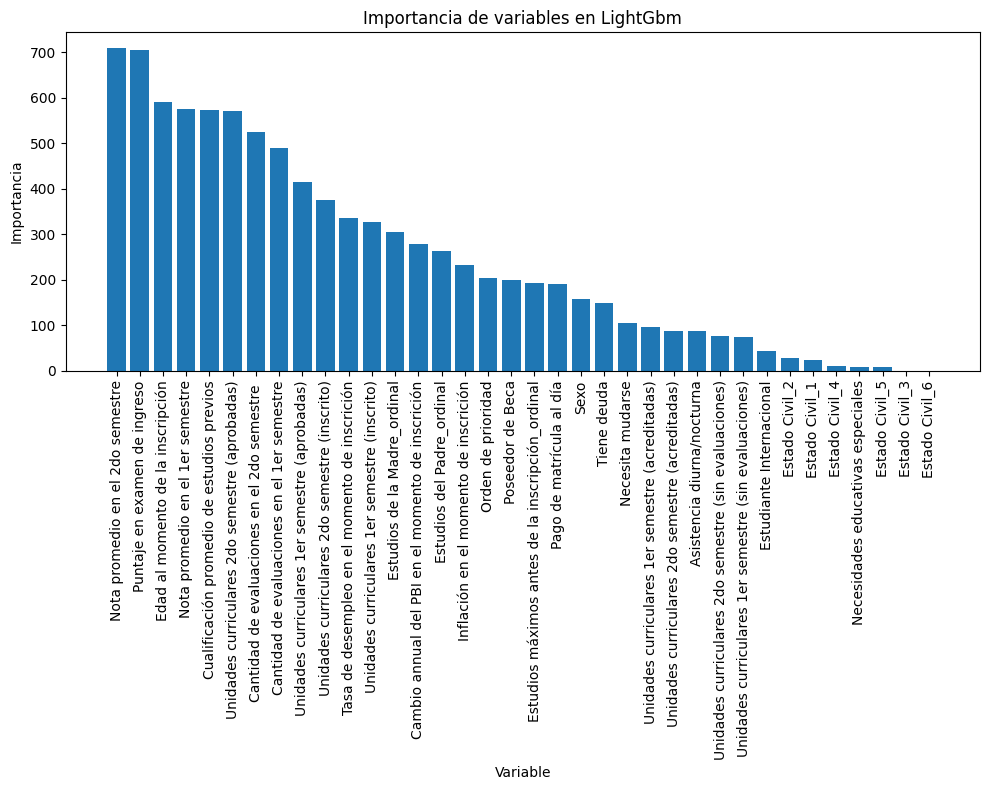

In [ ]:
lgbm_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(lgbm.feature_importances_),
    'Signo': np.sign(lgbm.feature_importances_)
    })


lgbm_importancia = lgbm_importancia.sort_values(by='Importancia', ascending=False)

experimento['Importancia_variables']=lgbm_importancia

plt.figure(figsize=(10, 8))
plt.bar(lgbm_importancia['Variable'], lgbm_importancia['Importancia'])
plt.xticks(rotation=90)  # Rotar etiquetas para que no se superpongan
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title(f'Importancia de variables en {nombre_caso}')
plt.tight_layout()
plt.savefig(f'{path}fig importancia {nombre_caso}.png', dpi=300, bbox_inches='tight')  # Guarda como PNG

plt.show()


### Resultados

In [ ]:
experimentos[caso]=experimento
experimento

{'Target': 'ternario',
 'nombre': 'LightGbm',
 'Hiperparámetros': {'feature_fraction': 0.5,
  'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 31},
 'modelo': LGBMClassifier(feature_fraction=0.5, max_depth=10, random_state=42),
 'accuracy_train': 0.8261299164913622,
 'accuracy': 0.799791759631117,
 'precision': 0.8055749983924008,
 'recall': 0.799791759631117,
 'f1': 0.8011336327855109,
 'Importancia_variables':                                              Variable  Importancia  Signo
 13                   Nota promedio en el 2do semestre          708      1
 2                        Puntaje en examen de ingreso          705      1
 0                   Edad al momento de la inscripción          591      1
 7                    Nota promedio en el 1er semestre          574      1
 1          Cualificación promedio de estudios previos          572      1
 12     Unidades curriculares 2do semestre (aprobadas)          570      1
 11       Cantidad de evaluac

In [ ]:
guarda_experimentos()

# Resumen de experimentos

In [ ]:
experimentos=carga_experimentos()
df_experimentos = pd.DataFrame(experimentos)
df_experimentos.to_csv(path+'experimentos.csv', index=True)
df_experimentos

,rl,dt,svm,voting,knn,dt_t,rf,bg knn,adb,lgbm
Target,binario,binario,binario,binario,ternario,ternario,ternario,ternario,ternario,ternario
nombre,Regresión Logística,Arbol de decisión,Support Vector Machine,Ensamble por Voting,knn,Arbol de decisión -target ternario,Random Forest,Bagging con Knn multiclase,Adaboost,LightGbm
Hiperparámetros,C = 4.281332398719396,max_depth = 7,C = 0.01,"Voting soft, modelos rl, dt, svm",Optimo de vecinos (según accuracy) 30,max_depth = 7,"{'n_estimators': 310, 'min_samples_split': 10,...",None,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...","{'feature_fraction': 0.5, 'learning_rate': 0.1..."
accuracy_train,0.881344,0.87408,0.879979,0.880832,0.999873,0.775228,0.942628,0.964238,0.787945,0.82613
accuracy,0.881167,0.873588,0.886235,0.883019,0.756879,0.775918,0.795329,0.767663,0.788041,0.799792
precision,0.905194,0.884198,0.919386,0.908625,0.76877,0.780664,0.801826,0.776278,0.794741,0.805575
recall,0.851566,0.859833,0.850287,0.855418,0.756879,0.775918,0.795329,0.767663,0.788041,0.799792
f1,0.877562,0.871845,0.883488,0.881219,0.759185,0.775378,0.796891,0.769334,0.789582,0.801134
modelo,"LogisticRegression(C=4.281332398719396, max_it...",DecisionTreeClassifier(ccp_alpha=0.00114185894...,"SVC(C=0.01, kernel='linear', max_iter=5000, pr...","VotingClassifier(estimators=[('rl',\n ...","KNeighborsClassifier(n_neighbors=40, weights='...",DecisionTreeClassifier(ccp_alpha=0.00160950859...,"(DecisionTreeClassifier(max_depth=33, max_feat...","(KNeighborsClassifier(n_neighbors=40, weights=...","(DecisionTreeClassifier(max_depth=1, random_st...","LGBMClassifier(feature_fraction=0.5, max_depth..."
Importancia_variables,V...,V...,V...,V...,None,V...,V...,NaN,NaN,V...
